In [713]:
# librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler


### ADE

In [714]:
# lectura de archivo
df = pd.read_csv('stats_survey.csv')
# revision de las primeras 3 filas
display(df.head(3))
# informacion del dataframe
display(df.info())

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

None

In [715]:
# aplicamos estadistica descriptiva
df.describe()

,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


In [716]:
"""
Para este caso las dos columnas numericas son nuestras columnas objetivo por lo cual no se consideran
para la creación del modelo.
"""

'\nPara este caso las dos columnas numericas son nuestras columnas objetivo por lo cual no se consideran\npara la creación del modelo.\n'

In [717]:
"""
La columna "Timestamp" será excluida ya que corresponde a la fecha y hora que fue realizada la encuesta por
lo tanto no será considerado para la creación de nuestro modelo de clasificación
"""

'\nLa columna "Timestamp" será excluida ya que corresponde a la fecha y hora que fue realizada la encuesta por\nlo tanto no será considerado para la creación de nuestro modelo de clasificación\n'

In [718]:
# Se crea un nuevo dataframe excluyendo la columna timestamp
df = df.iloc[:,1:]
df.head(3)

,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close


In [719]:
# definicion de columnas categoricas
columnas_numericas = ['Your Matric (grade 12) Average/ GPA (in %)', 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']
# todas las columnas restantes que no sean columnas numericas
columnas_categoricas = [x for x in list(df.columns) if x not in columnas_numericas]
display(columnas_numericas)
display(columnas_categoricas)
display(len(columnas_categoricas))

['Your Matric (grade 12) Average/ GPA (in %)',
 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']

['Your Sex?',
 'What year were you in last year (2023) ?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Monthly Allowance in 2023',
 'Were you on scholarship/bursary in 2023?',
 'Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'Are you currently in a romantic relationship?',
 'Do your parents approve alcohol consumption?',
 'How strong is your relationship with your parent/s?']

14

In [720]:
"""
    Datos faltantes 

"""

# para los datos faltantes vamos a completar con el promdio de los mismos, se decide rellenar los dato de esta manera debido a que apartir de los analsisi anterior se evidencia que los encuestados mantienen un promedio similar 
df[columnas_numericas] = df[columnas_numericas].fillna(df[columnas_numericas].median())

# Imputar valores faltantes en columnas categóricas con la moda
df[columnas_categoricas] = df[columnas_categoricas].fillna(df[columnas_categoricas].mode().iloc[0])

In [721]:
"""
Nos centraremos en nuestras columnas categoricas, aplicaremos diferentes visualizaciónes para conocer acerca de la distribución de las mismas, posterior aplicaremos gráficas que involuren nuestras variables categoricas y numericas
"""

'\nNos centraremos en nuestras columnas categoricas, aplicaremos diferentes visualizaciónes para conocer acerca de la distribución de las mismas, posterior aplicaremos gráficas que involuren nuestras variables categoricas y numericas\n'

In [722]:
df.columns

Index(['Your Sex?', 'Your Matric (grade 12) Average/ GPA (in %)',
       'What year were you in last year (2023) ?',
       'What faculty does your degree fall under?',
       'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
       'Your Accommodation Status Last Year (2023)',
       'Monthly Allowance in 2023', 'Were you on scholarship/bursary in 2023?',
       'Additional amount of studying (in hrs) per week',
       'How often do you go out partying/socialising during the week? ',
       'On a night out, how many alcoholic drinks do you consume?',
       'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
       'How many modules have you failed thus far into your studies?',
       'Are you currently in a romantic relationship?',
       'Do your parents approve alcohol consumption?',
       'How strong is your relationship with your parent/s?'],
      dtype='object')

In [723]:
"""
Creamos tres grupos dos de 6 y 1 de 2
"""

'\nCreamos tres grupos dos de 6 y 1 de 2\n'

In [724]:
grupo_uno = columnas_categoricas[:6]
display(grupo_uno)
display(len(grupo_uno))
grupo_dos = columnas_categoricas[6:12]
display(grupo_dos)
display(len(grupo_dos))
grupo_tres = columnas_categoricas[12:14]
display(grupo_tres)
display(len(grupo_tres))

['Your Sex?',
 'What year were you in last year (2023) ?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Monthly Allowance in 2023',
 'Were you on scholarship/bursary in 2023?']

6

['Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'Are you currently in a romantic relationship?']

6

['Do your parents approve alcohol consumption?',
 'How strong is your relationship with your parent/s?']

2

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Your Sex?                                                                                          406 non-null    object 
 1   Your Matric (grade 12) Average/ GPA (in %)                                                         406 non-null    float64
 2   What year were you in last year (2023) ?                                                           406 non-null    object 
 3   What faculty does your degree fall under?                                                          406 non-null    object 
 4   Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                 406 non-null    float64

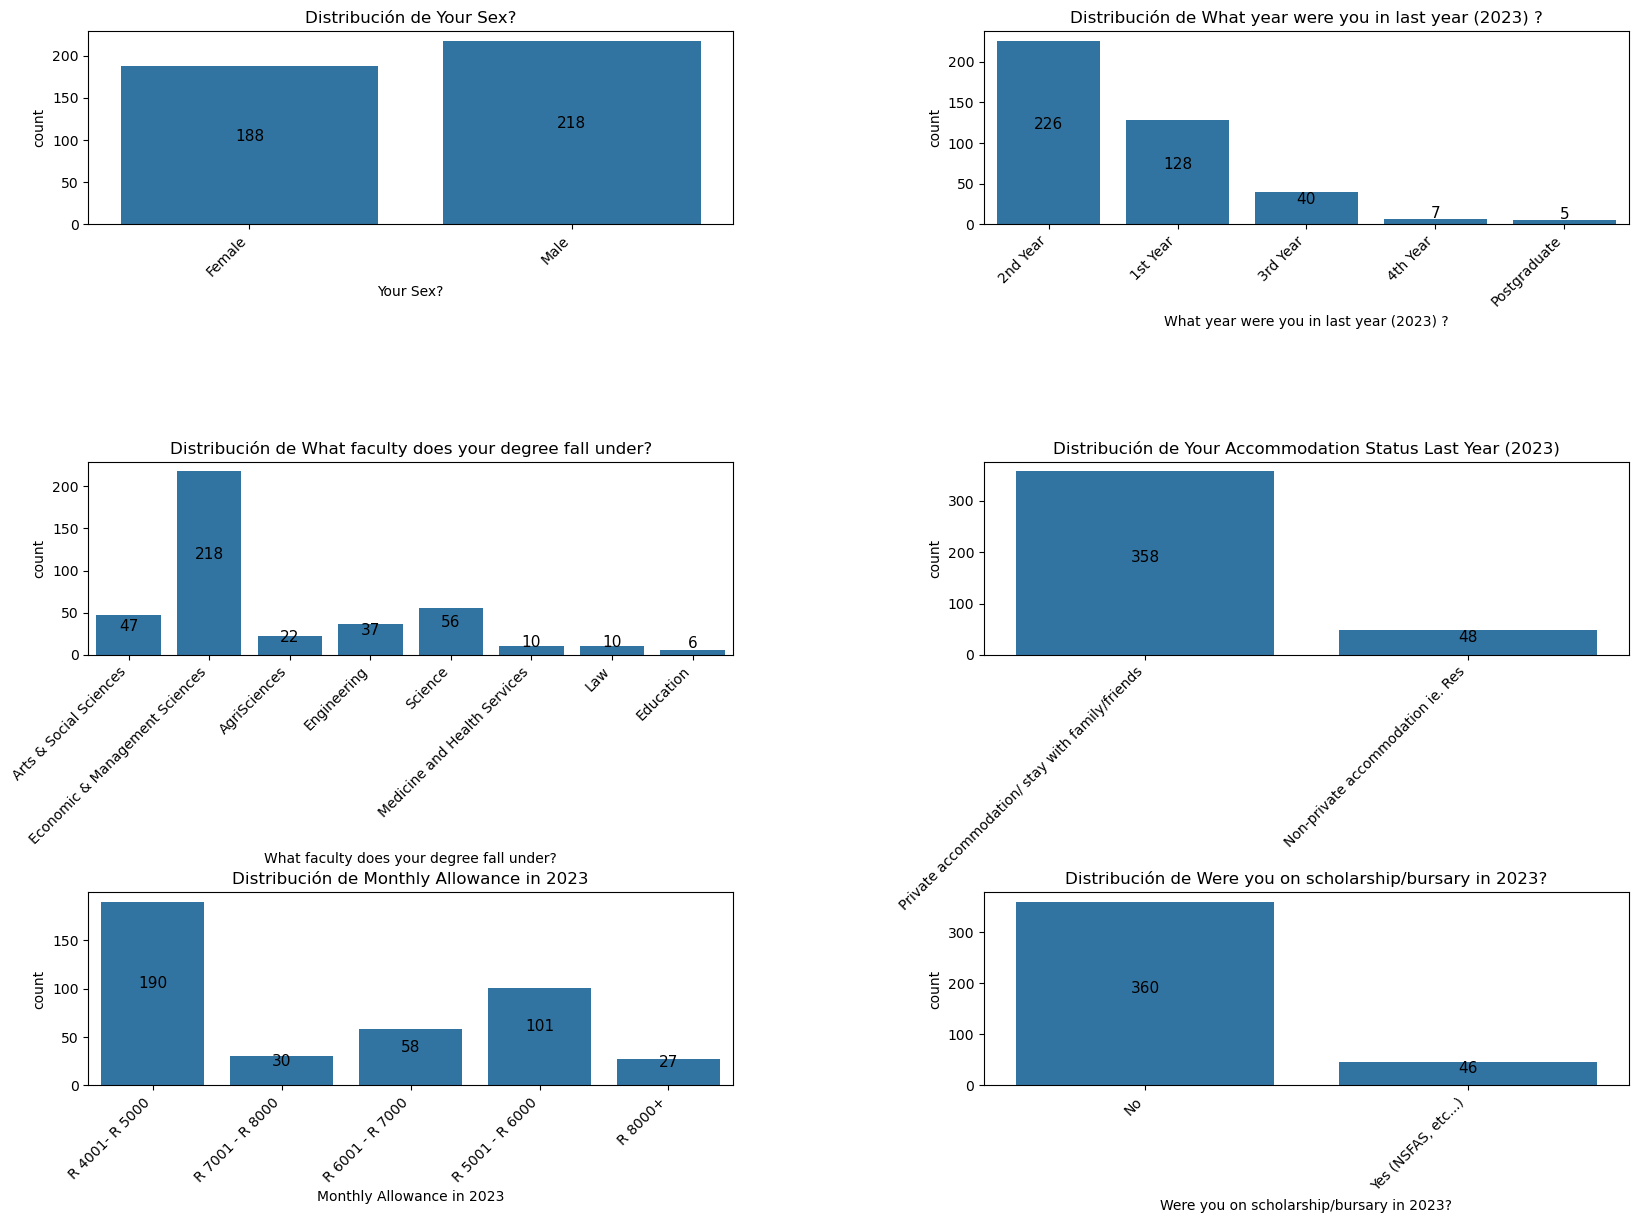

In [726]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_uno):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.countplot(x=var, data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

In [727]:

""" 
A partir de las graficas anteriores podemos notar los siguientes puntos:
- La mayoria de encuestados es de genero masculino
- La mayoria de encuestados en el 2023 eran de segundo y primer año
- La mayoria de encuestados pertenecen a la facultad de Ciencias económicas y de gestión 
- La mayoria de encuestados viven con familiares
- El dinero destinado mensualmenten a los encuestados esta en el rango de 4001 - 5001 rands que realizando al conversion a dolares a la fecha equivale a 224.34 a 280.41
- La mayoria de encuestados no tenian beca en el 2023
"""

' \nA partir de las graficas anteriores podemos notar los siguientes puntos:\n- La mayoria de encuestados es de genero masculino\n- La mayoria de encuestados en el 2023 eran de segundo y primer año\n- La mayoria de encuestados pertenecen a la facultad de Ciencias económicas y de gestión \n- La mayoria de encuestados viven con familiares\n- El dinero destinado mensualmenten a los encuestados esta en el rango de 4001 - 5001 rands que realizando al conversion a dolares a la fecha equivale a 224.34 a 280.41\n- La mayoria de encuestados no tenian beca en el 2023\n'

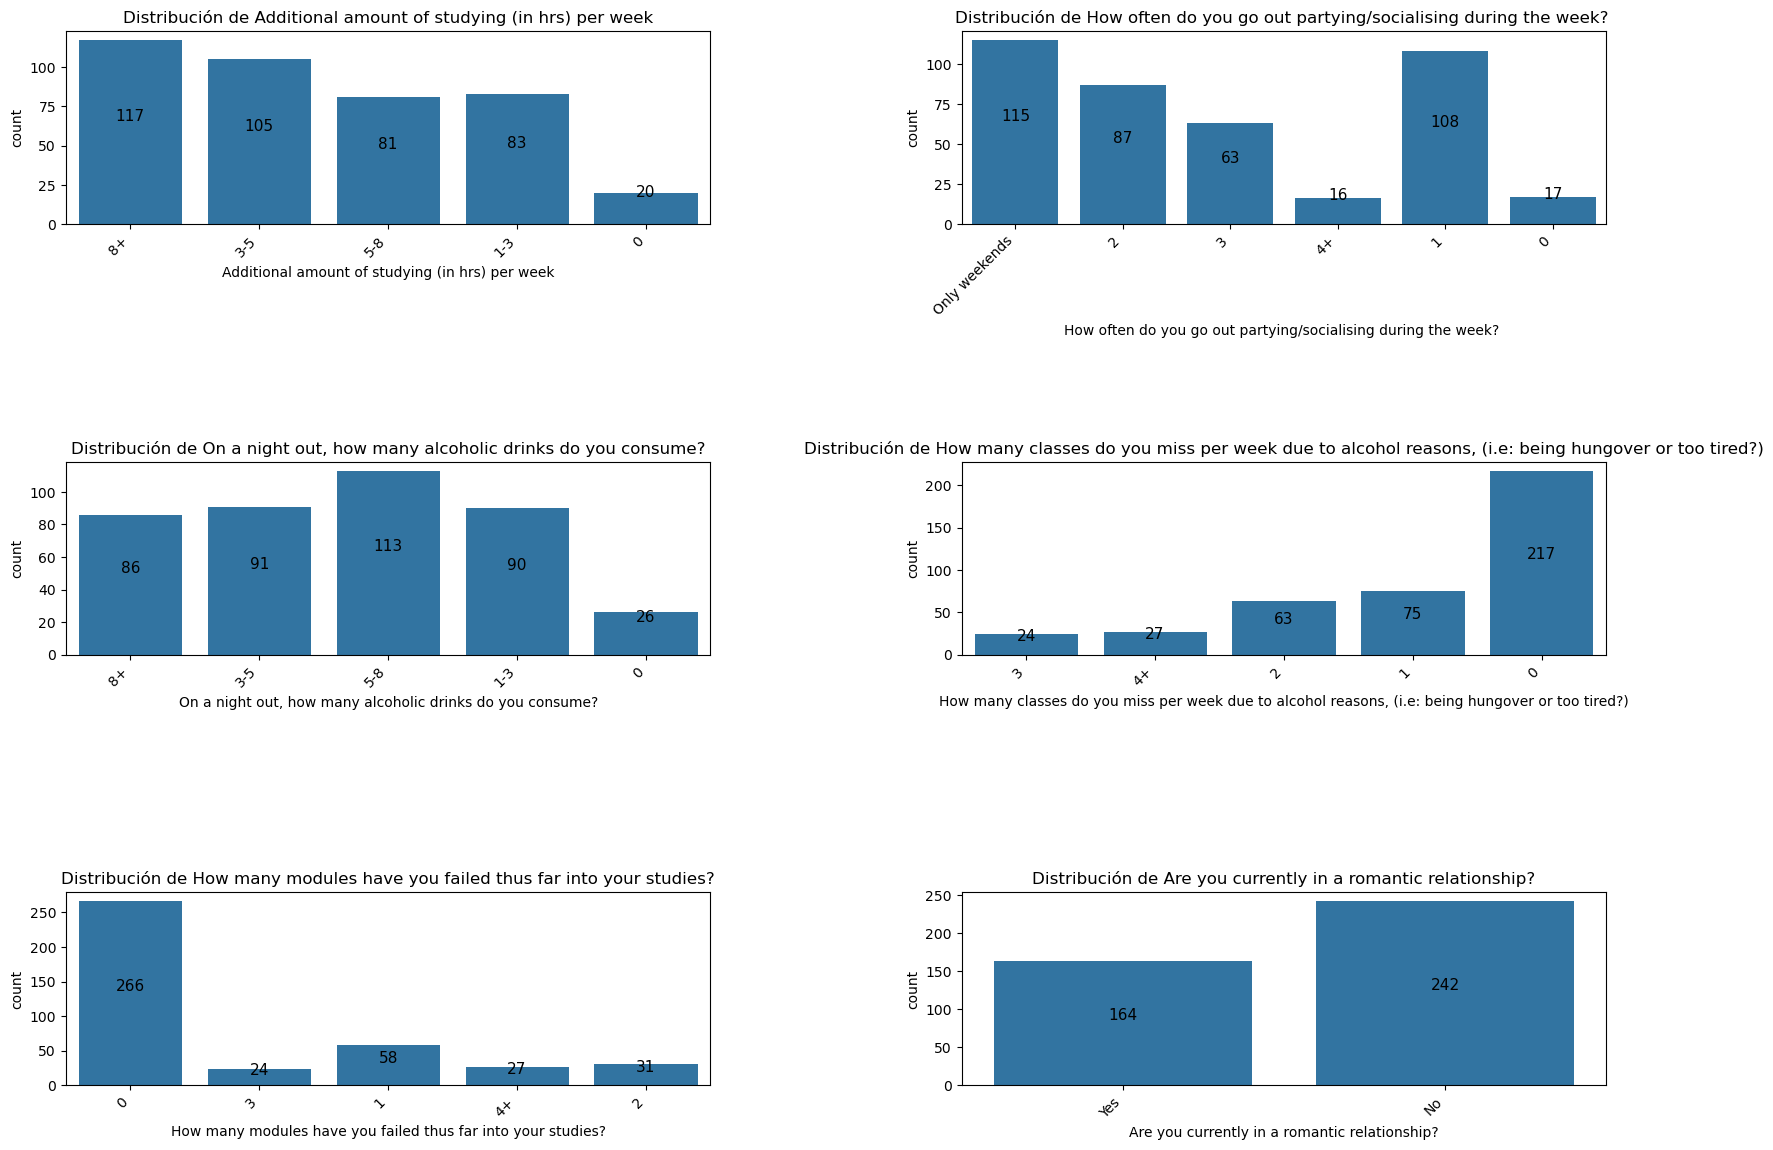

In [728]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_dos):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.countplot(x=var, data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

In [729]:

""" 
A partir de las graficas anteriores podemos notar los siguientes puntos:
- La mayoria de encuestados destinan mas de 8 horas adicionales en estudio
- La mayoria de encuestados solo salen el fin de semana , el segundo grupo mas grande sale 1 vez a la semana, esto puede ser a casusa que exiten estudiantes que el año anterior eran de primer año por lo tanto se enfocaban mucho mas a sus estudios
- La mayoria de encuestados beben entre 5 y 8 bebidas alcoholicas, esto es interesante ya que tenemos tres grupos casi similares: mas de 8 bebidas, 3 a 5 bebidas y 1 a 3 bebidas
- La mayoria de encuestados no faltaban a clases a causa del consumo de alcohol, de igual manera , esto puede ser a casusa que exiten estudiantes que el año anterior eran de primer año por lo tanto se enfocaban mucho mas a sus estudios
- El dinero destinado mensualmenten no perdieron algun modulo, de igual manera , esto puede ser a casusa que exiten estudiantes que el año anterior eran de primer año por lo tanto se enfocaban mucho mas a sus estudios
- La mayoria de encuestados no tienen una relación sentimental se puede inducir que el consumo de alcohol es debido a eventos sociales, fiestas, reuniones, entre otros.
"""

' \nA partir de las graficas anteriores podemos notar los siguientes puntos:\n- La mayoria de encuestados destinan mas de 8 horas adicionales en estudio\n- La mayoria de encuestados solo salen el fin de semana , el segundo grupo mas grande sale 1 vez a la semana, esto puede ser a casusa que exiten estudiantes que el año anterior eran de primer año por lo tanto se enfocaban mucho mas a sus estudios\n- La mayoria de encuestados beben entre 5 y 8 bebidas alcoholicas, esto es interesante ya que tenemos tres grupos casi similares: mas de 8 bebidas, 3 a 5 bebidas y 1 a 3 bebidas\n- La mayoria de encuestados no faltaban a clases a causa del consumo de alcohol, de igual manera , esto puede ser a casusa que exiten estudiantes que el año anterior eran de primer año por lo tanto se enfocaban mucho mas a sus estudios\n- El dinero destinado mensualmenten no perdieron algun modulo, de igual manera , esto puede ser a casusa que exiten estudiantes que el año anterior eran de primer año por lo tanto se

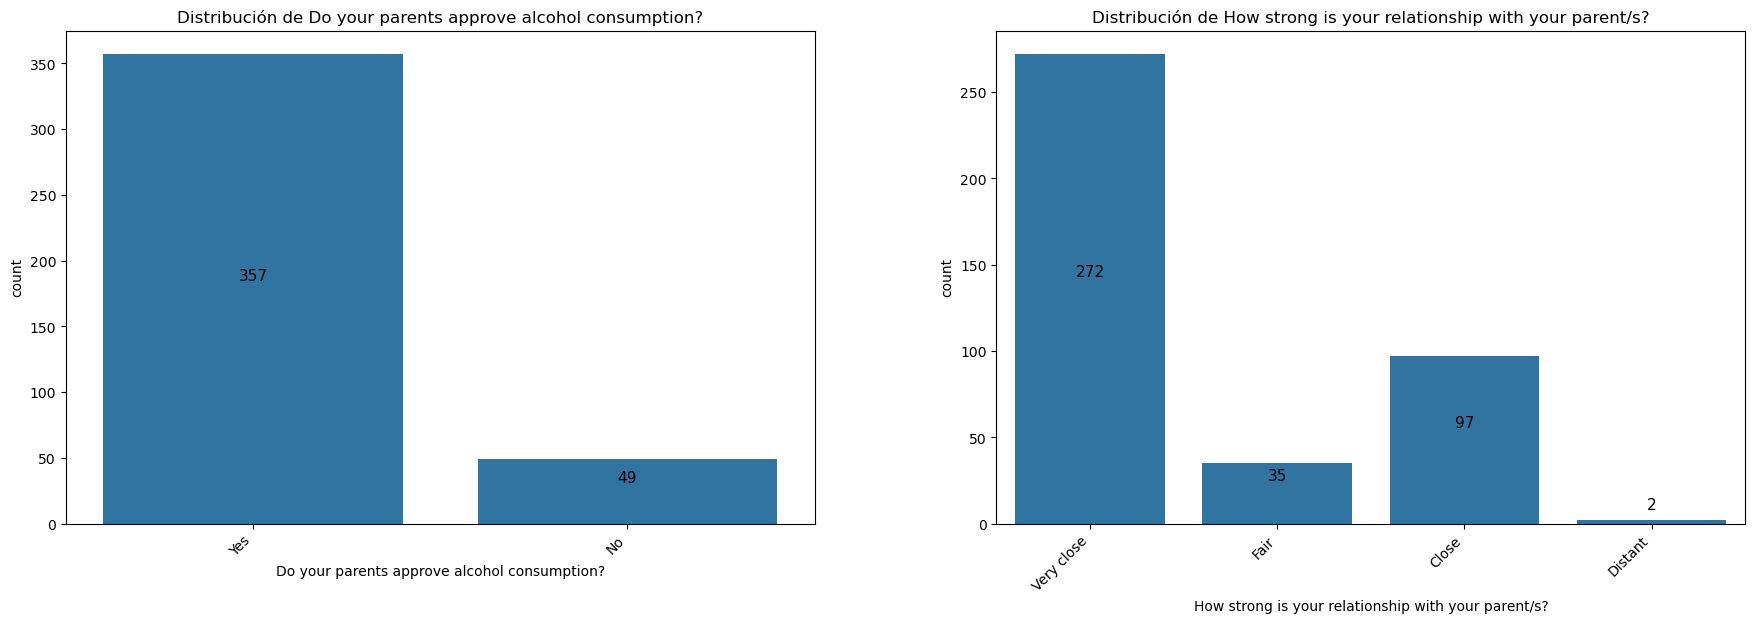

In [730]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura para dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=10.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_tres):
    ax = axes[i]
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )

plt.show()


In [731]:

""" 
A partir de las graficas anteriores podemos notar los siguientes puntos:
- La mayoria de encuestados tienen consendimiento de sus padres para ingerir alcohol
- La mayoria de encuestados tienen una relación muy cercana con sus padres 
"""

' \nA partir de las graficas anteriores podemos notar los siguientes puntos:\n- La mayoria de encuestados tienen consendimiento de sus padres para ingerir alcohol\n- La mayoria de encuestados tienen una relación muy cercana con sus padres \n'

In [732]:
"""

A continuación relacionaremos nuestras anteiores graficas con las columnas objetivo de nuestro estudio

"""

'\n\nA continuación relacionaremos nuestras anteiores graficas con las columnas objetivo de nuestro estudio\n\n'

In [733]:
"""
   Promedios
"""

'\n   Promedios\n'

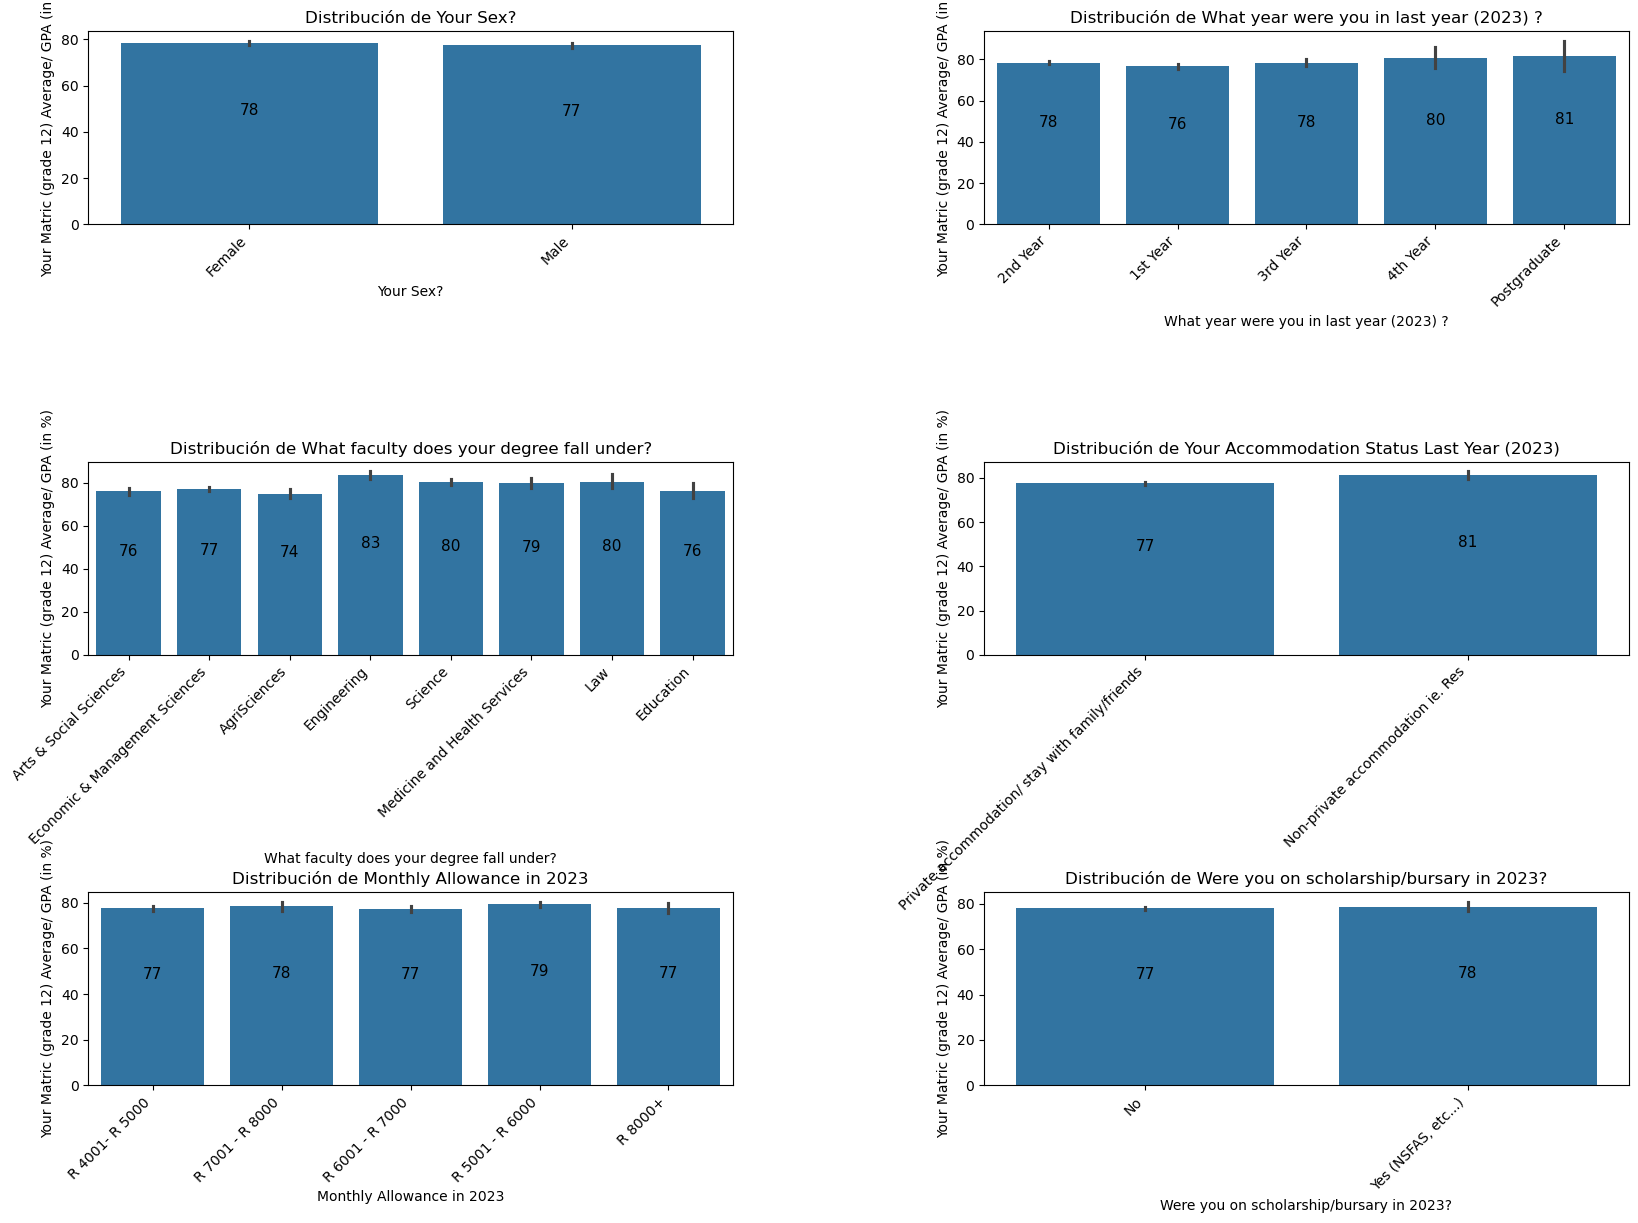

In [734]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_uno):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.barplot(x=var, y=columnas_numericas[0], data=df, ax=ax)
        # axes[0, 0].set_title('Promedio del GPA por Sexo')
        # sns.countplot(x=var, data=df, ax=)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

In [735]:

""" 
A partir de las graficas anteriores podemos notar los siguientes puntos:
- En todas las graficas vemos un promedio similar esto indica que entre los diferentes grupos que existen los estudiantes se mantienen en un rango moderado de notas
"""

' \nA partir de las graficas anteriores podemos notar los siguientes puntos:\n- En todas las graficas vemos un promedio similar esto indica que entre los diferentes grupos que existen los estudiantes se mantienen en un rango moderado de notas\n'

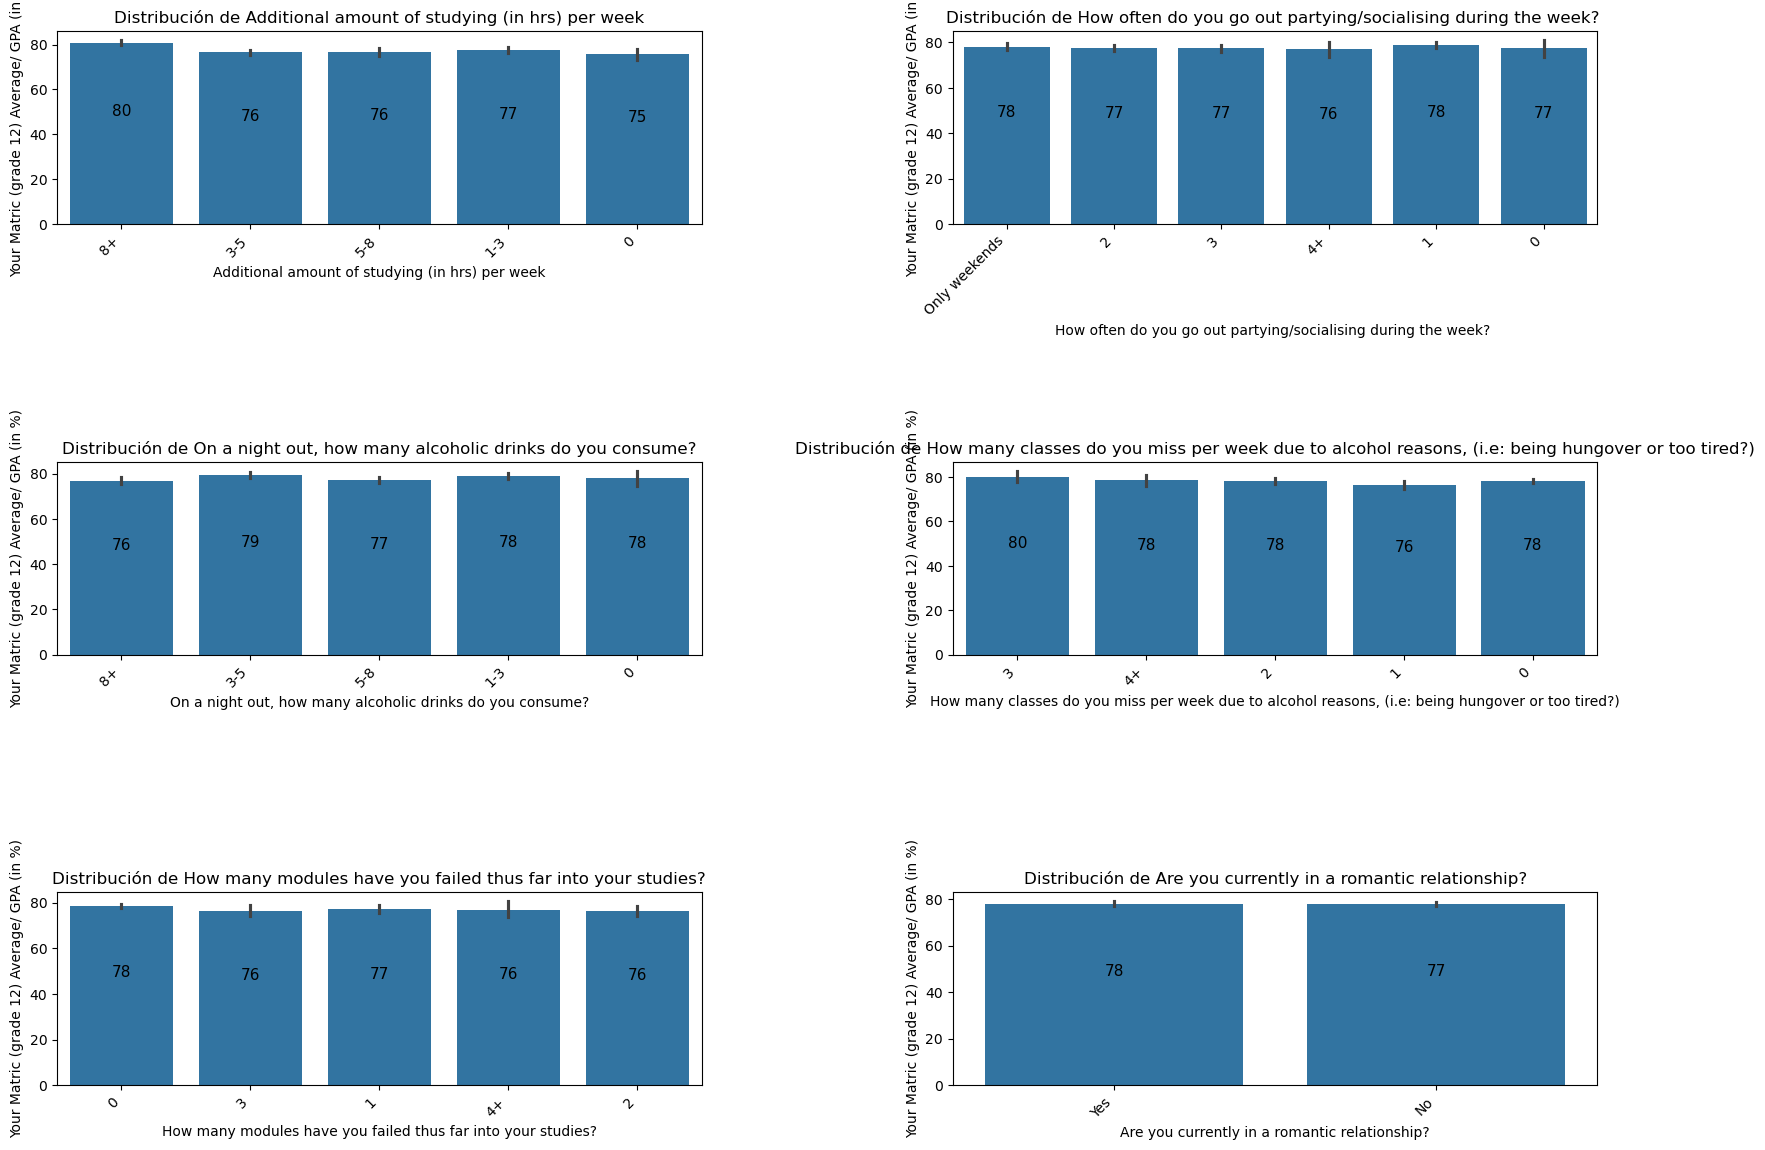

In [736]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_dos):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.barplot(x=var, y=columnas_numericas[0], data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

In [737]:

""" 
A partir de las graficas anteriores podemos notar los siguientes puntos:
- En todas las graficas vemos un promedio similar esto indica que entre los diferentes grupos que existen los estudiantes se mantienen en un rango moderado de notas
"""

' \nA partir de las graficas anteriores podemos notar los siguientes puntos:\n- En todas las graficas vemos un promedio similar esto indica que entre los diferentes grupos que existen los estudiantes se mantienen en un rango moderado de notas\n'

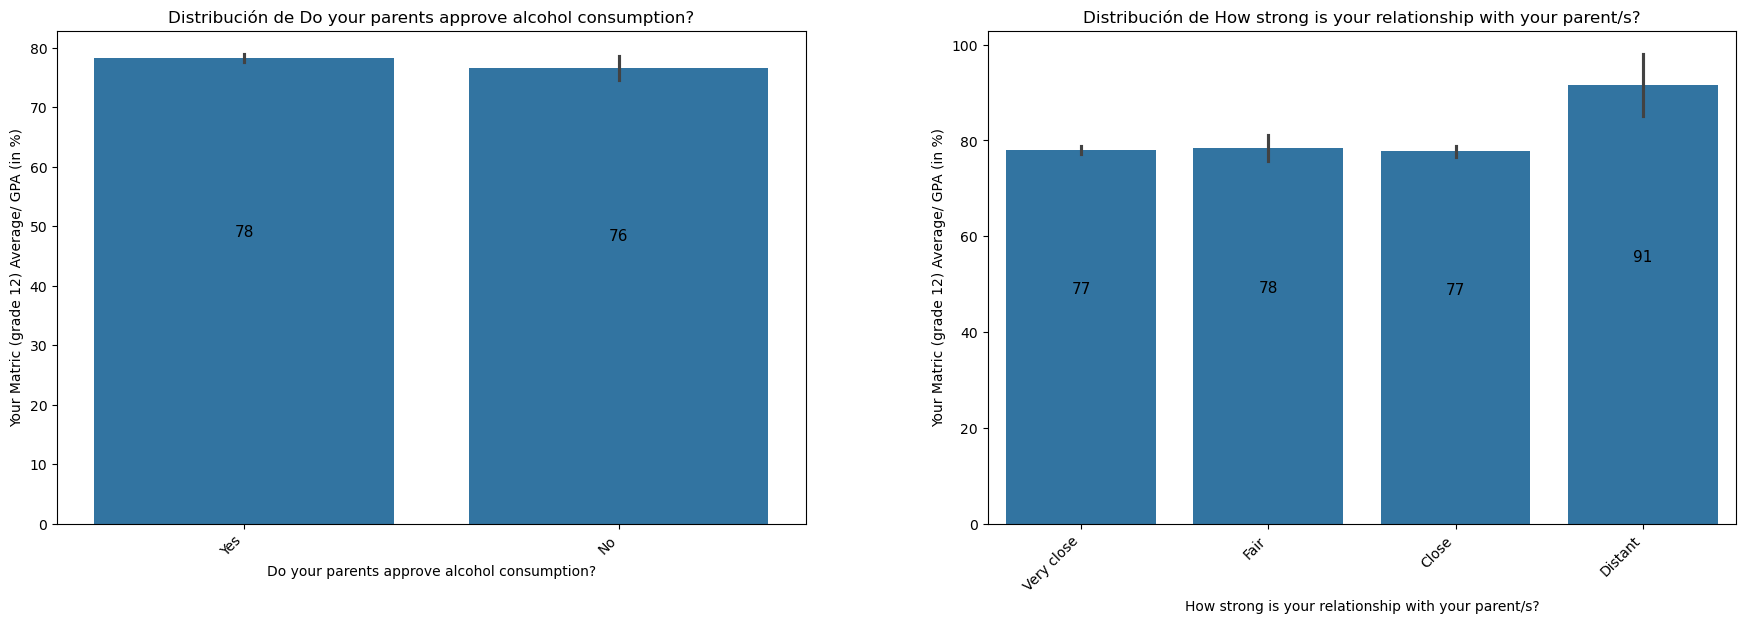

In [738]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura para dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=10.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_tres):
    ax = axes[i]
    sns.barplot(x=var, y=columnas_numericas[0], data=df, ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )

plt.show()


In [739]:
df.describe()

,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
count,406.000000,406.000000
mean,77.989901,65.999778
std,6.987439,8.135325
min,34.000000,30.000000
25%,74.000000,61.000000
50%,78.000000,65.000000
75%,83.000000,70.000000
max,99.000000,95.220000


In [740]:

""" 
A partir de las graficas anteriores podemos notar los siguientes puntos:
- Igualmente que los casos anteriores, pero se encuentra algo novedoso es que los encuestados que mantiene una relacion distante tienen un promedio por encima de la poblacion en general que es de 77.98
"""

' \nA partir de las graficas anteriores podemos notar los siguientes puntos:\n- Igualmente que los casos anteriores, pero se encuentra algo novedoso es que los encuestados que mantiene una relacion distante tienen un promedio por encima de la poblacion en general que es de 77.98\n'

In [741]:
"""
DIAGRAMA DE VIOLIN
"""

'\nDIAGRAMA DE VIOLIN\n'

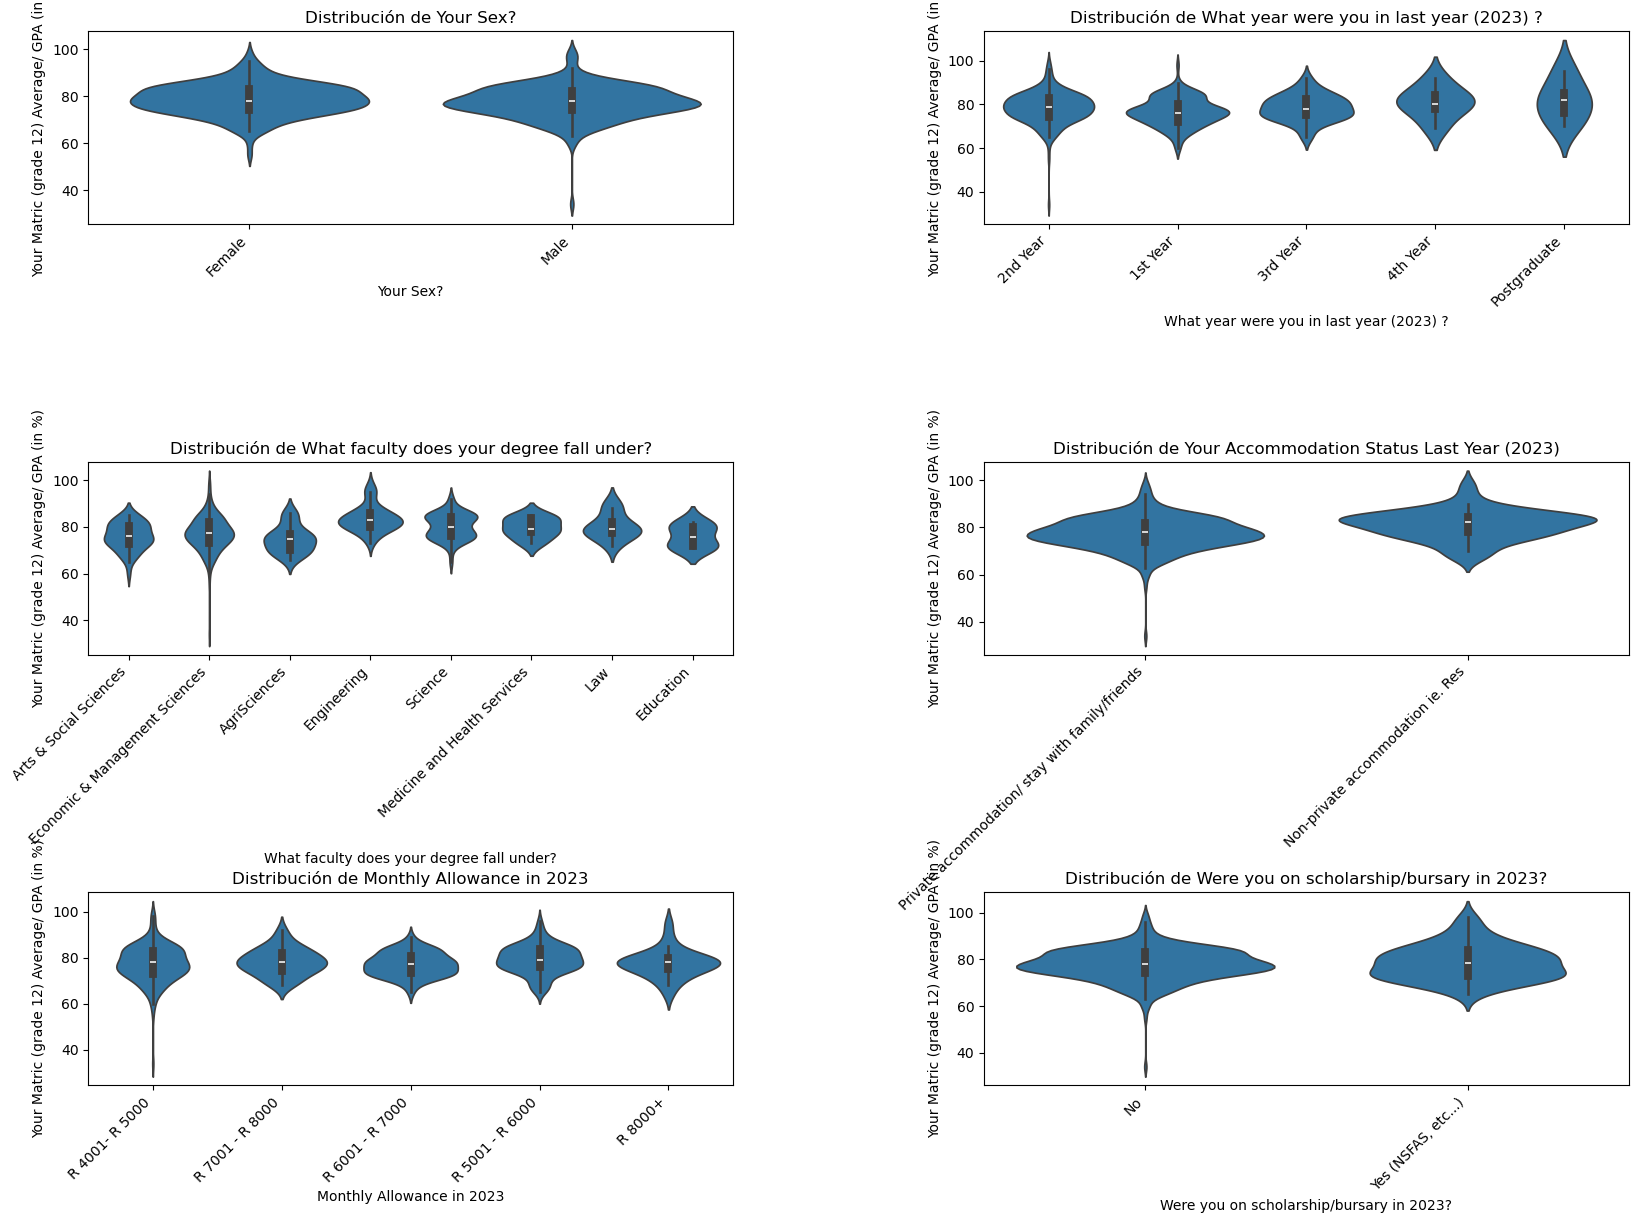

In [742]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_uno):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.violinplot(x=var, y=columnas_numericas[0], data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

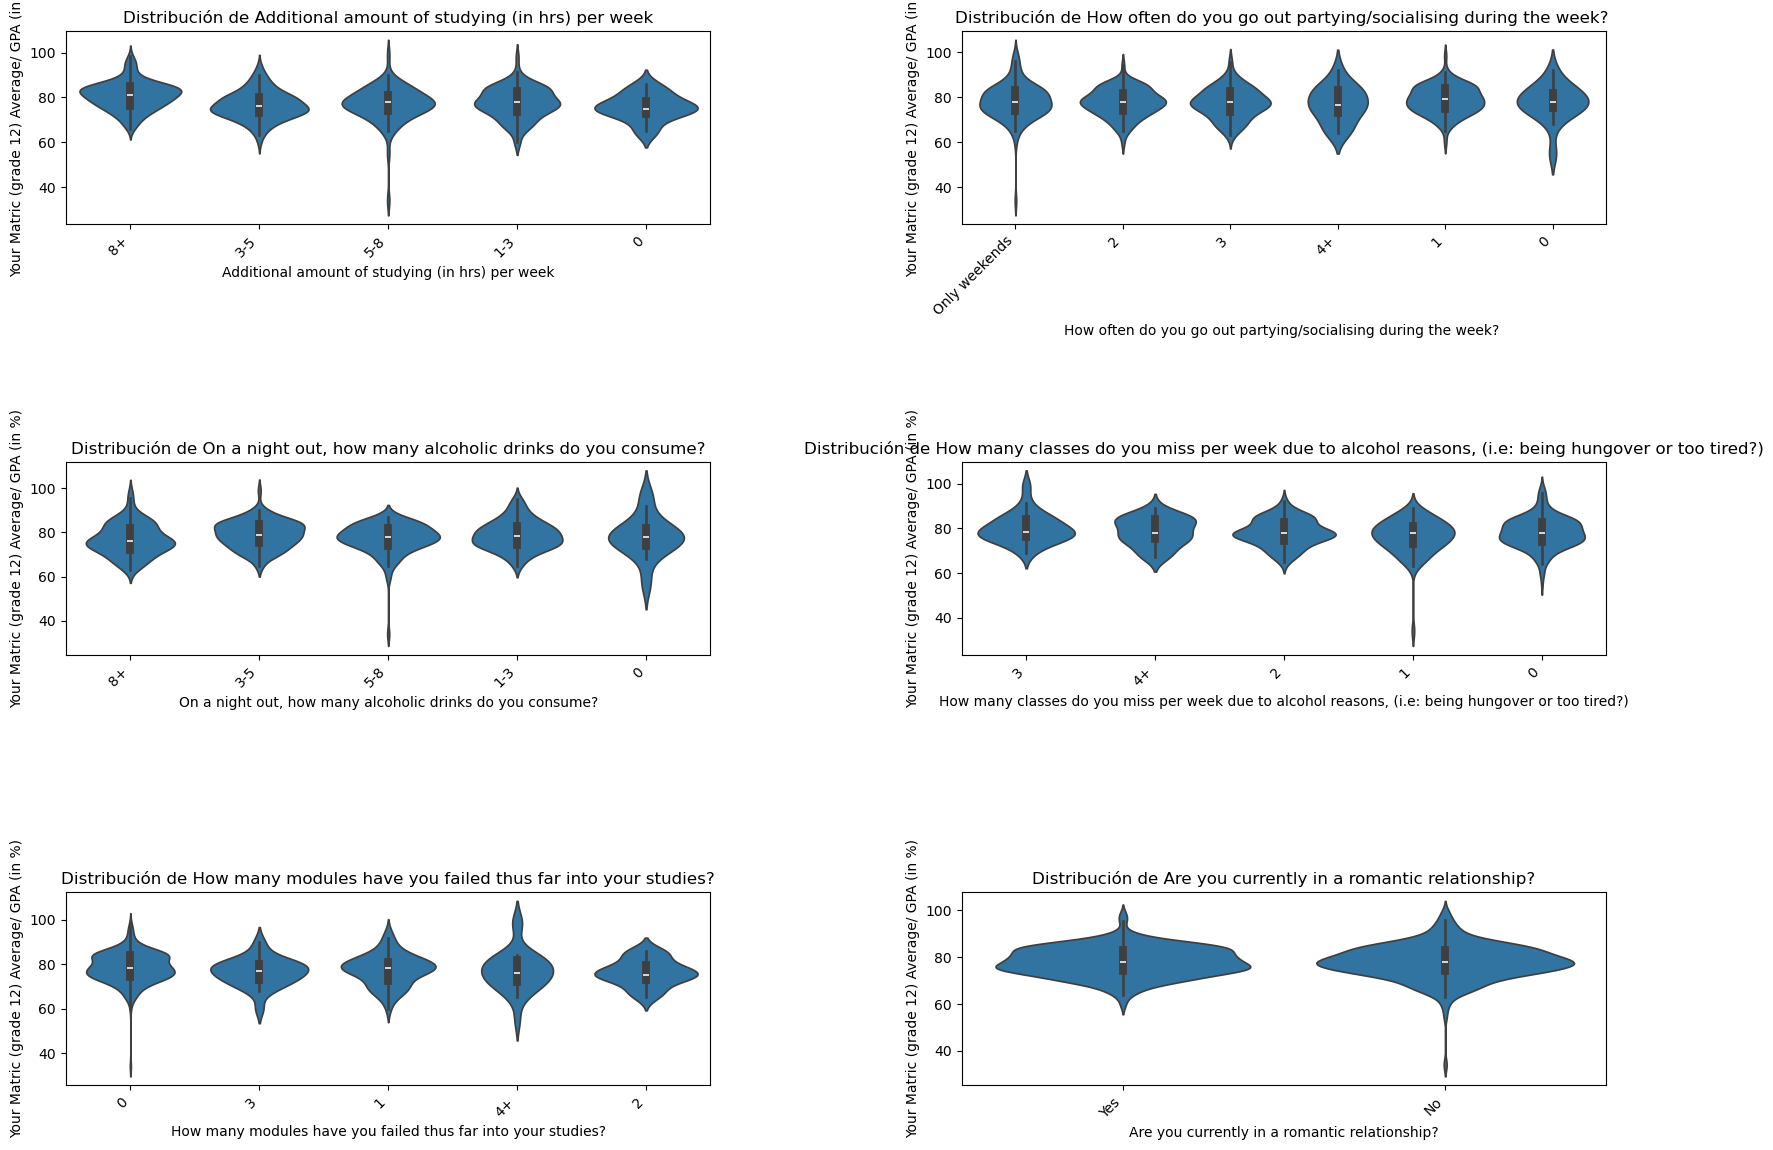

In [743]:
# Suprimir todos los warnings
warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_dos):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df.columns:
        sns.violinplot(x=var, y=columnas_numericas[0], data=df, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

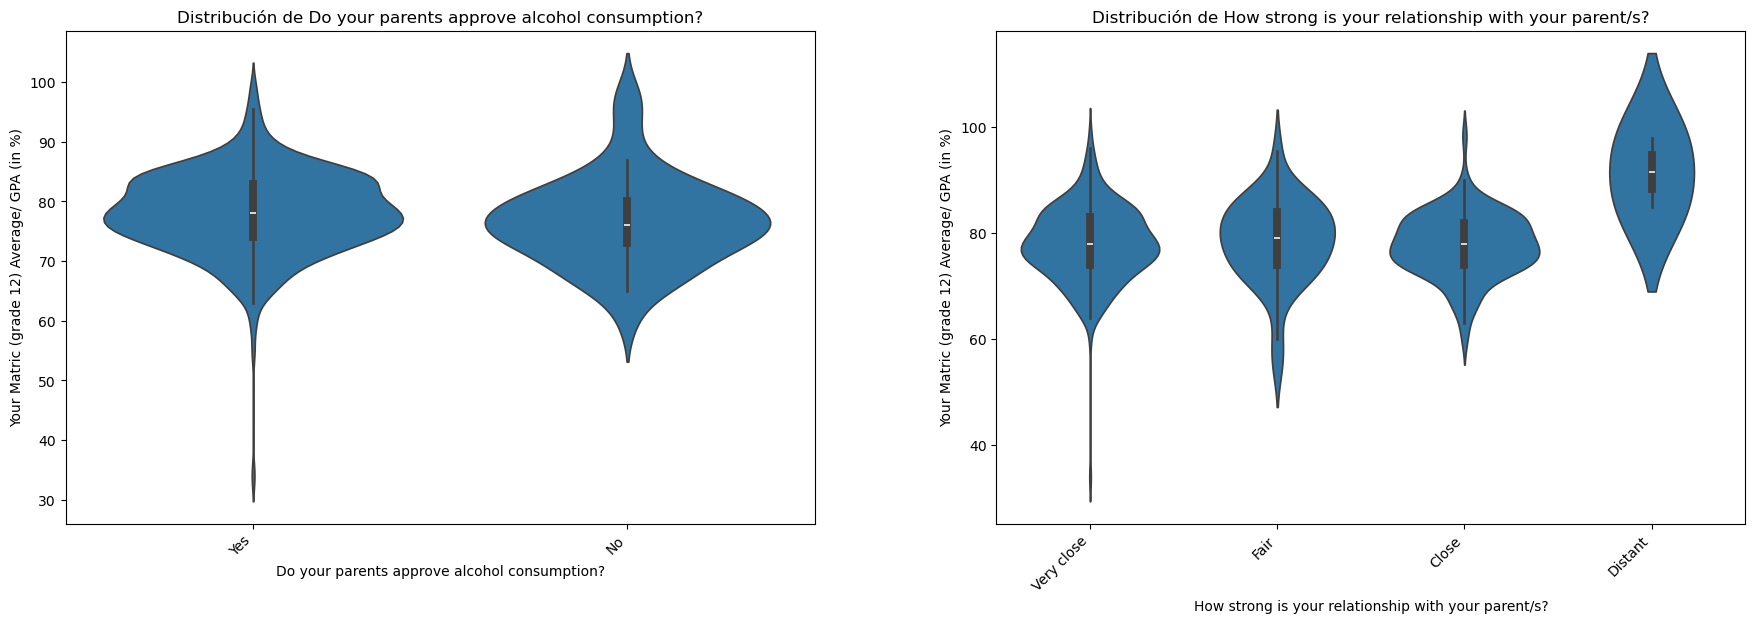

In [744]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura para dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=10.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(grupo_tres):
    ax = axes[i]
    sns.violinplot(x=var, y=columnas_numericas[0], data=df, ax=ax)
    ax.set_title(f'Distribución de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )

plt.show()


In [745]:
"""

En todas las graficas de violin se puede evidenciar que la densidad de distribución de los datos es similar para todos los casos

"""

'\n\nEn todas las graficas de violin se puede evidenciar que la densidad de distribución de los datos es similar para todos los casos\n\n'

In [746]:

"""
    Ahora un analisis a las variables numericas
"""

'\n    Ahora un analisis a las variables numericas\n'

In [747]:
df.describe()

,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
count,406.000000,406.000000
mean,77.989901,65.999778
std,6.987439,8.135325
min,34.000000,30.000000
25%,74.000000,61.000000
50%,78.000000,65.000000
75%,83.000000,70.000000
max,99.000000,95.220000


In [748]:
"""
CHAT GPT
Conclusión sobre la Descripción de las Variables Numéricas
1. Promedio de Calificaciones de Matric (Grado 12):

Media: El promedio general de las calificaciones de Matric es del 77.99%, lo que indica un rendimiento académico bastante sólido en el último año de secundaria.
Desviación Estándar: La desviación estándar es de 7.05%, lo que sugiere una variabilidad moderada en las calificaciones, con algunos estudiantes obteniendo calificaciones significativamente por encima o por debajo de la media.
Rango: Las calificaciones varían desde un mínimo de 34% hasta un máximo de 99%, lo que muestra una amplia gama de desempeños académicos.
Percentiles: Los percentiles indican que el 25% inferior de las calificaciones está por debajo del 74%, mientras que el 75% superior está por encima del 83%. La mediana es de 78%, sugiriendo que la mayoría de los estudiantes se agrupan en torno a esta cifra.
2. Promedio Académico del Año 2023:

Media: El promedio general del año académico 2023 es del 66.27%, que es notablemente inferior al promedio de Matric.
Desviación Estándar: La desviación estándar es de 9.15%, indicando una mayor variabilidad en las calificaciones del año 2023 en comparación con Matric.
Rango: Las calificaciones van desde un mínimo de 30% hasta un máximo de 95.22%, mostrando también una amplia variabilidad en el rendimiento académico durante el año.
Percentiles: El 25% inferior de las calificaciones está por debajo del 60%, y el 75% superior está por encima del 73%. La mediana es de 65%, que es inferior a la mediana de las calificaciones de Matric, indicando un descenso en el rendimiento académico.
Conclusión General:

En general, se observa una disminución en el rendimiento académico de los estudiantes desde el último año de secundaria hasta el año académico 2023. El promedio de calificaciones del año 2023 es significativamente más bajo que el promedio de Matric, y la mayor desviación estándar sugiere una mayor variabilidad en las calificaciones del último año en comparación con el desempeño en Matric. Estos resultados podrían señalar la presencia de desafíos adicionales enfrentados durante el año académico 2023 o diferencias en las condiciones de evaluación.

"""

'\nCHAT GPT\nConclusión sobre la Descripción de las Variables Numéricas\n1. Promedio de Calificaciones de Matric (Grado 12):\n\nMedia: El promedio general de las calificaciones de Matric es del 77.99%, lo que indica un rendimiento académico bastante sólido en el último año de secundaria.\nDesviación Estándar: La desviación estándar es de 7.05%, lo que sugiere una variabilidad moderada en las calificaciones, con algunos estudiantes obteniendo calificaciones significativamente por encima o por debajo de la media.\nRango: Las calificaciones varían desde un mínimo de 34% hasta un máximo de 99%, lo que muestra una amplia gama de desempeños académicos.\nPercentiles: Los percentiles indican que el 25% inferior de las calificaciones está por debajo del 74%, mientras que el 75% superior está por encima del 83%. La mediana es de 78%, sugiriendo que la mayoría de los estudiantes se agrupan en torno a esta cifra.\n2. Promedio Académico del Año 2023:\n\nMedia: El promedio general del año académico 

In [749]:
"""
Para finalizar vamos a realizar un analisis de la normalidad
"""

'\nPara finalizar vamos a realizar un analisis de la normalidad\n'

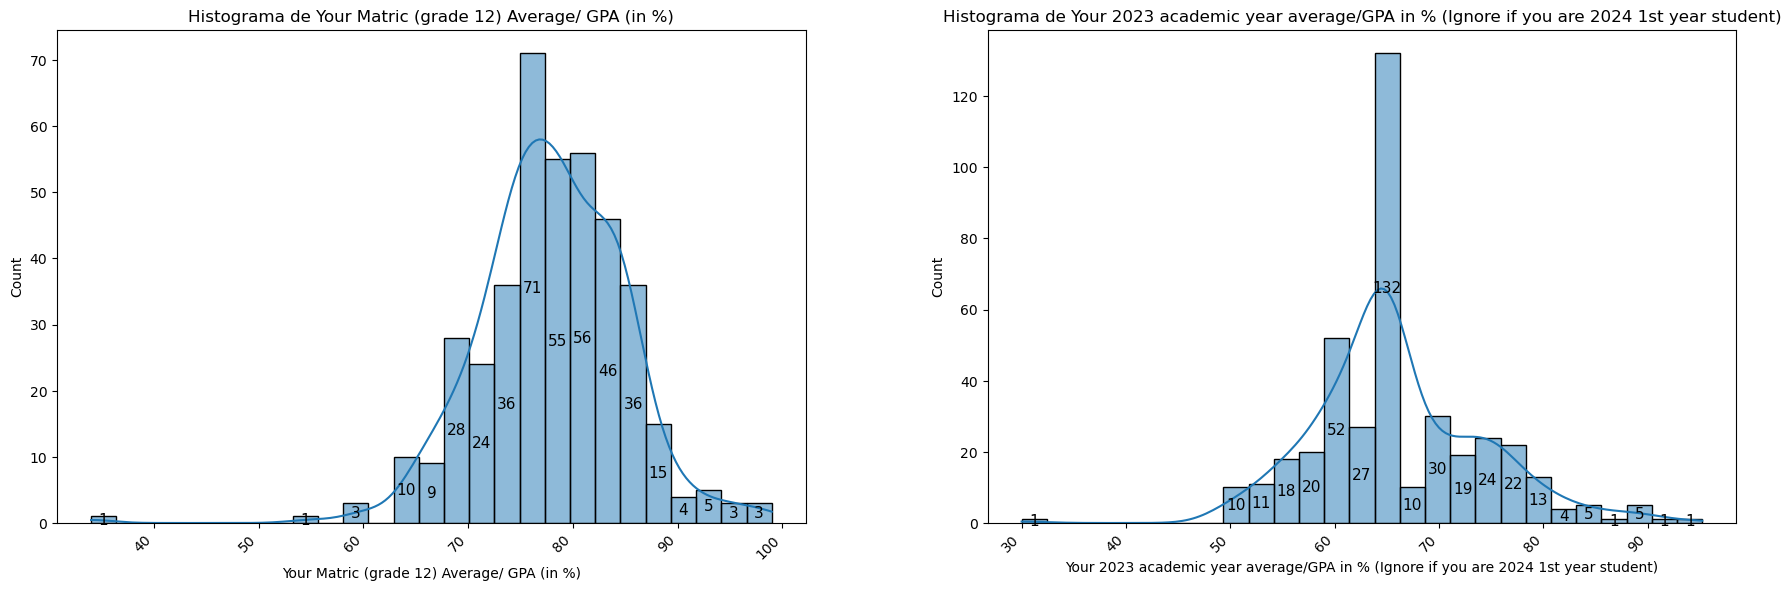

In [750]:

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura para dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=10.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(columnas_numericas):
    ax = axes[i]
    sns.histplot(data=df, x=var, ax=ax, kde=True)
    ax.set_title(f'Histograma de {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            if height != 0 :     
                # Añadir el texto encima de la barra
                ax.text(
                    p.get_x() + p.get_width() / 2.,  # x
                    height * 0.5,                         # y
                    f'{int(height)}',                     # texto
                    ha='center',                     # alineación horizontal
                    va='center',                     # alineación vertical
                    fontsize=11,                     # tamaño de la fuente
                    color='black'                    # color del texto
                )

plt.show()

3.7977687239329643

-0.5558981709381399

1.3137824730688616

0.4174261914694576

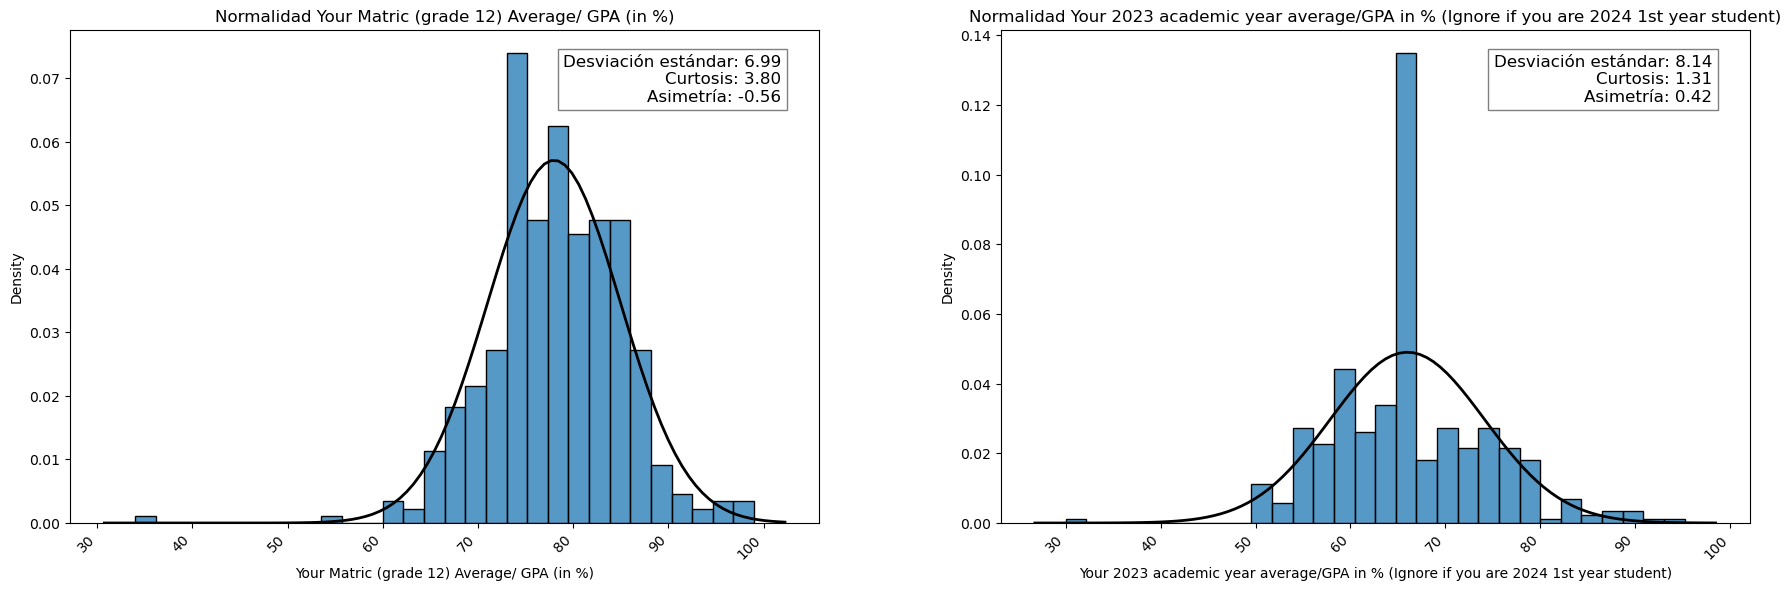

In [751]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Configuración de la figura para dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=10.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(columnas_numericas):

    ax = axes[i]
    
    # Histograma con Seaborn
    sns.histplot(data=df, x=var, ax=ax, kde=False, bins=30, stat='density')
    
    # Cálculo de parámetros
    mu, std = df[var].mean(), df[var].std()
    kurtosis = df[var].kurtosis()
    skewness = df[var].skew()

    display(kurtosis)
    display(skewness)
    
    # Generar la curva de la distribución normal
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)
    
    # Personalizar el gráfico
    ax.set_title(f'Normalidad {var}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Añadir estadísticas en la esquina superior derecha
    stats_text = (
        f"Desviación estándar: {std:.2f}\n"
        f"Curtosis: {kurtosis:.2f}\n"
        f"Asimetría: {skewness:.2f}"
    )
    ax.text(
        0.95, 0.95, stats_text,  # posición en la esquina superior derecha
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,  # usar coordenadas de ejes para la posición
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.5)
    )

plt.show()


In [752]:
""" CHATGPT
1. Curtosis
Curtosis = 3.80:

Esto es mayor que 3, lo que indica que la distribución de tus datos tiene colas más pesadas y picos más altos que una distribución normal (la distribución normal tiene una curtosis de 3).
Curtosis Leptocúrtica: Las distribuciones con una curtosis mayor a 3 tienen colas más extremas y un pico más agudo, lo que significa que hay una mayor probabilidad de valores extremos en comparación con una distribución normal.
Curtosis = 1.31:

Esto es menor que 3, lo que indica que la distribución tiene colas menos pesadas y un pico más plano que una distribución normal.
Curtosis Platicúrtica: Las distribuciones con una curtosis menor a 3 son más planas y tienen colas menos extremas, sugiriendo una menor probabilidad de valores extremos comparado con una distribución normal.
2. Asimetría
Asimetría = -0.56:

Esto indica que la distribución está asimétrica a la izquierda (o sesgada negativamente). Los datos tienen una cola más larga en el lado izquierdo de la distribución y el pico está desplazado hacia la derecha.
En otras palabras, hay una tendencia a que los valores sean menores que la media, y hay una concentración de datos en el lado derecho.
Asimetría = 0.42:

Esto indica que la distribución está asimétrica a la derecha (o sesgada positivamente). Los datos tienen una cola más larga en el lado derecho de la distribución y el pico está desplazado hacia la izquierda.
En otras palabras, hay una tendencia a que los valores sean mayores que la media, y hay una concentración de datos en el lado izquierdo.
Conclusiones Generales:
Distribución 1 (Curtosis = 3.80, Asimetría = -0.56):

Colas Pesadas: La distribución tiene colas más pesadas y un pico más alto que una normal, lo que sugiere una mayor probabilidad de valores extremos.
Sesgo Negativo: Los datos están sesgados hacia la izquierda, indicando una tendencia hacia valores más bajos.
Distribución 2 (Curtosis = 1.31, Asimetría = 0.42):

Colas Menos Pesadas: La distribución tiene colas menos pesadas y un pico más plano, sugiriendo menos probabilidad de valores extremos.
Sesgo Positivo: Los datos están sesgados hacia la derecha, indicando una tendencia hacia valores más altos.
En resumen, la curtosis te dice cómo se comportan las colas y el pico de la distribución en comparación con una normal, mientras que la asimetría te indica la dirección y el grado de sesgo de la distribución. Estos dos estadísticos juntos te ofrecen una visión detallada de la forma y el comportamiento de tus datos.

"""

' CHATGPT\n1. Curtosis\nCurtosis = 3.80:\n\nEsto es mayor que 3, lo que indica que la distribución de tus datos tiene colas más pesadas y picos más altos que una distribución normal (la distribución normal tiene una curtosis de 3).\nCurtosis Leptocúrtica: Las distribuciones con una curtosis mayor a 3 tienen colas más extremas y un pico más agudo, lo que significa que hay una mayor probabilidad de valores extremos en comparación con una distribución normal.\nCurtosis = 1.31:\n\nEsto es menor que 3, lo que indica que la distribución tiene colas menos pesadas y un pico más plano que una distribución normal.\nCurtosis Platicúrtica: Las distribuciones con una curtosis menor a 3 son más planas y tienen colas menos extremas, sugiriendo una menor probabilidad de valores extremos comparado con una distribución normal.\n2. Asimetría\nAsimetría = -0.56:\n\nEsto indica que la distribución está asimétrica a la izquierda (o sesgada negativamente). Los datos tienen una cola más larga en el lado izqui

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Your Sex?                                                                                          406 non-null    object 
 1   Your Matric (grade 12) Average/ GPA (in %)                                                         406 non-null    float64
 2   What year were you in last year (2023) ?                                                           406 non-null    object 
 3   What faculty does your degree fall under?                                                          406 non-null    object 
 4   Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                 406 non-null    float64

In [754]:
"""
Preparación de Datos para el Modelo
"""

'\nPreparación de Datos para el Modelo\n'

In [755]:
"""
    Preparacion de datos categoricos
    
    Categóricas Nominales
    Las variables categóricas nominales son aquellas que representan categorías sin un orden específico. Aquí se agrupan los datos en categorías distintas sin implicar una jerarquía.

    Categóricas Ordinales
    Las variables categóricas ordinales tienen un orden implícito entre las categorías. Aquí está una posible clasificación

"""

'\n    Preparacion de datos categoricos\n    \n    Categóricas Nominales\n    Las variables categóricas nominales son aquellas que representan categorías sin un orden específico. Aquí se agrupan los datos en categorías distintas sin implicar una jerarquía.\n\n    Categóricas Ordinales\n    Las variables categóricas ordinales tienen un orden implícito entre las categorías. Aquí está una posible clasificación\n\n'

In [756]:
columnas_categoricas

['Your Sex?',
 'What year were you in last year (2023) ?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Monthly Allowance in 2023',
 'Were you on scholarship/bursary in 2023?',
 'Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'Are you currently in a romantic relationship?',
 'Do your parents approve alcohol consumption?',
 'How strong is your relationship with your parent/s?']

In [757]:
"""
    Analizaremos cada categorica

    Categóricas Nominales
    Your Sex?

    Ejemplo de valores: 'Female', 'Male'
    Tipo: Categórica nominal
    What faculty does your degree fall under?

    Ejemplo de valores: 'Arts & Social Sciences', 'Economic & Management Sciences', 'Engineering', 'AgriSciences'
    Tipo: Categórica nominal
    Your Accommodation Status Last Year (2023)

    Ejemplo de valores: 'Private accommodation/ stay with family/friends'
    Tipo: Categórica nominal
    Were you on scholarship/bursary in 2023?

    Ejemplo de valores: 'No', 'Yes (NSFAS, etc...)'
    Tipo: Categórica nominal
    Are you currently in a romantic relationship?

    Ejemplo de valores: 'Yes', 'No'
    Tipo: Categórica nominal
    Do your parents approve alcohol consumption?

    Ejemplo de valores: 'Yes', 'No'
    Tipo: Categórica nominal

    Categóricas Ordinales
    What year were you in last year (2023)?

    Ejemplo de valores: '1st Year', '2nd Year'
    Tipo: Categórica ordinal (hay un orden implícito en los años de estudio)
    Monthly Allowance in 2023

    Ejemplo de valores: 'R 4001- R 5000', 'R 7001 - R 8000'
    Tipo: Categórica ordinal (los rangos de cantidad tienen un orden implícito)
    Additional amount of studying (in hrs) per week

    Ejemplo de valores: '8+', '3-5'
    Tipo: Categórica ordinal (las categorías indican rangos con un orden implícito)
    How often do you go out partying/socialising during the week?

    Ejemplo de valores: 'Only weekends', '2', '3'
    Tipo: Categórica ordinal (si las respuestas representan un orden de frecuencia, como 'Sólo fines de semana', '2 veces', '3 veces', etc.)
    On a night out, how many alcoholic drinks do you consume?

    Ejemplo de valores: '8+', '3-5'
    Tipo: Categórica ordinal (los rangos tienen un orden implícito)
    How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)

    Ejemplo de valores: '3', '4+'
    Tipo: Categórica ordinal (los números indican una cantidad con un orden implícito)
    How many modules have you failed thus far into your studies?

    Ejemplo de valores: '0', '3'
    Tipo: Categórica ordinal (los números indican un rango con un orden implícito)
    How strong is your relationship with your parent/s?

    Ejemplo de valores: 'Very close', 'Fair'
    Tipo: Categórica ordinal (las respuestas indican un nivel de cercanía con un orden implícito)
"""

"\n    Analizaremos cada categorica\n\n    Categóricas Nominales\n    Your Sex?\n\n    Ejemplo de valores: 'Female', 'Male'\n    Tipo: Categórica nominal\n    What faculty does your degree fall under?\n\n    Ejemplo de valores: 'Arts & Social Sciences', 'Economic & Management Sciences', 'Engineering', 'AgriSciences'\n    Tipo: Categórica nominal\n    Your Accommodation Status Last Year (2023)\n\n    Ejemplo de valores: 'Private accommodation/ stay with family/friends'\n    Tipo: Categórica nominal\n    Were you on scholarship/bursary in 2023?\n\n    Ejemplo de valores: 'No', 'Yes (NSFAS, etc...)'\n    Tipo: Categórica nominal\n    Are you currently in a romantic relationship?\n\n    Ejemplo de valores: 'Yes', 'No'\n    Tipo: Categórica nominal\n    Do your parents approve alcohol consumption?\n\n    Ejemplo de valores: 'Yes', 'No'\n    Tipo: Categórica nominal\n\n    Categóricas Ordinales\n    What year were you in last year (2023)?\n\n    Ejemplo de valores: '1st Year', '2nd Year'\n  

In [758]:
columnas_categoricas

['Your Sex?',
 'What year were you in last year (2023) ?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Monthly Allowance in 2023',
 'Were you on scholarship/bursary in 2023?',
 'Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'Are you currently in a romantic relationship?',
 'Do your parents approve alcohol consumption?',
 'How strong is your relationship with your parent/s?']

In [759]:
"""
    SEPARAMOS EN NOMIANLES Y ORDINALES
"""

'\n    SEPARAMOS EN NOMIANLES Y ORDINALES\n'

In [760]:
columnas_categoricas_nominales = [
    'Your Sex?',
       'What faculty does your degree fall under?',
      'Your Accommodation Status Last Year (2023)',
      'Were you on scholarship/bursary in 2023?',
      'Are you currently in a romantic relationship?',
       'Do your parents approve alcohol consumption?',
]
columnas_categoricas_ordinales = [x for x in columnas_categoricas if x not in columnas_categoricas_nominales]

display(columnas_categoricas_nominales)
display(columnas_categoricas_ordinales)


['Your Sex?',
 'What faculty does your degree fall under?',
 'Your Accommodation Status Last Year (2023)',
 'Were you on scholarship/bursary in 2023?',
 'Are you currently in a romantic relationship?',
 'Do your parents approve alcohol consumption?']

['What year were you in last year (2023) ?',
 'Monthly Allowance in 2023',
 'Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'How strong is your relationship with your parent/s?']

In [761]:
# nuevo dataframe con las columnas nomiales y ordinales 
df = df[columnas_categoricas_nominales + columnas_categoricas_ordinales + columnas_numericas]
df

,Your Sex?,What faculty does your degree fall under?,Your Accommodation Status Last Year (2023),Were you on scholarship/bursary in 2023?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,What year were you in last year (2023) ?,Monthly Allowance in 2023,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,How strong is your relationship with your parent/s?,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
0,Female,Arts & Social Sciences,Private accommodation/ stay with family/friends,No,Yes,Yes,2nd Year,R 4001- R 5000,8+,Only weekends,8+,3,0,Very close,76.0,72.0
1,Male,Economic & Management Sciences,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",No,Yes,2nd Year,R 7001 - R 8000,8+,Only weekends,3-5,4+,0,Very close,89.0,75.0
2,Male,AgriSciences,Private accommodation/ stay with family/friends,No,No,Yes,1st Year,R 4001- R 5000,3-5,2,8+,3,0,Very close,76.0,55.0
3,Male,Engineering,Private accommodation/ stay with family/friends,No,Yes,Yes,2nd Year,R 6001 - R 7000,3-5,3,8+,2,0,Very close,89.0,84.0
4,Female,Arts & Social Sciences,Private accommodation/ stay with family/friends,No,No,Yes,2nd Year,R 4001- R 5000,3-5,Only weekends,5-8,1,3,Fair,74.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Female,Science,Private accommodation/ stay with family/friends,No,No,Yes,2nd Year,R 4001- R 5000,3-5,3,1-3,0,0,Close,74.0,65.0
402,Female,Economic & Management Sciences,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",Yes,Yes,2nd Year,R 6001 - R 7000,5-8,1,8+,0,0,Very close,73.0,58.0
403,Female,Economic & Management Sciences,Private accommodation/ stay with family/friends,No,No,Yes,1st Year,R 4001- R 5000,5-8,2,3-5,1,0,Very close,86.0,65.0
404,Male,Economic & Management Sciences,Private accommodation/ stay with family/friends,No,No,Yes,2nd Year,R 4001- R 5000,1-3,4+,5-8,4+,0,Close,85.0,65.0


In [762]:
display(df[columnas_categoricas_ordinales[0]].value_counts())
display(df[columnas_categoricas_ordinales[1]].value_counts())
display(df[columnas_categoricas_ordinales[2]].value_counts())
display(df[columnas_categoricas_ordinales[3]].value_counts())
display(df[columnas_categoricas_ordinales[4]].value_counts())
display(df[columnas_categoricas_ordinales[5]].value_counts())
display(df[columnas_categoricas_ordinales[6]].value_counts())
display(df[columnas_categoricas_ordinales[7]].value_counts())

What year were you in last year (2023) ?
2nd Year        226
1st Year        128
3rd Year         40
4th Year          7
Postgraduate      5
Name: count, dtype: int64

Monthly Allowance in 2023
R 4001- R 5000     190
R 5001 - R 6000    101
R 6001 - R 7000     58
R 7001 - R 8000     30
R 8000+             27
Name: count, dtype: int64

Additional amount of studying (in hrs) per week
8+     117
3-5    105
1-3     83
5-8     81
0       20
Name: count, dtype: int64

How often do you go out partying/socialising during the week? 
Only weekends    115
1                108
2                 87
3                 63
0                 17
4+                16
Name: count, dtype: int64

On a night out, how many alcoholic drinks do you consume?
5-8    113
3-5     91
1-3     90
8+      86
0       26
Name: count, dtype: int64

How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)
0     217
1      75
2      63
4+     27
3      24
Name: count, dtype: int64

How many modules have you failed thus far into your studies?
0     266
1      58
2      31
4+     27
3      24
Name: count, dtype: int64

How strong is your relationship with your parent/s?
Very close    272
Close          97
Fair           35
Distant         2
Name: count, dtype: int64

In [763]:
"""
 ORDINALES se aplica ordinalEncoder

 """

'\n ORDINALES se aplica ordinalEncoder\n\n '

In [764]:
dict_ordinales = {'What year were you in last year (2023) ?': 
    ['1st Year',
  '2nd Year',
  '3rd Year',
  '4th Year',
  'Postgraduate'
  ],
 'Monthly Allowance in 2023': ['R 4001- R 5000',
  'R 5001 - R 6000',
  'R 6001 - R 7000',
  'R 7001 - R 8000',
  'R 8000+',
  ],
 'Additional amount of studying (in hrs) per week': [
  '0',
  '1-3',
  '3-5',
  '5-8',
  '8+'
  ],
 'How often do you go out partying/socialising during the week? ': [
  '0',
  '1',
  '3',
  '2',
  '4+',
  'Only weekends'],
 'On a night out, how many alcoholic drinks do you consume?': [
  '0',
  '1-3',
  '3-5',
  '5-8',
  '8+'],
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)': [
     '0',
  '1',
  '2',
  '3',
    '4+',],
 'How many modules have you failed thus far into your studies?': ['0',
  '1',
  '2',
  '3',
  '4+',],
 'How strong is your relationship with your parent/s?': [
  'Distant',
     'Fair',
       'Close',
         'Very close',
  ]}
# Crear el OrdinalEncoder
encoder = OrdinalEncoder(categories=[values for values in dict_ordinales.values()])

# Codificar las columnas ordinales
df_encoded = df.copy()
for column, categories in dict_ordinales.items():
    df_encoded[column] = pd.Categorical(df[column], categories=categories, ordered=True)

# display(df_encoded.head(3))
# display(dict_ordinales)

# Aplicar OrdinalEncoder
df_encoded[list(dict_ordinales.keys())] = encoder.fit_transform(df_encoded[list(dict_ordinales.keys())])

# Imprimir el DataFrame codificado
df_encoded

,Your Sex?,What faculty does your degree fall under?,Your Accommodation Status Last Year (2023),Were you on scholarship/bursary in 2023?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,What year were you in last year (2023) ?,Monthly Allowance in 2023,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,How strong is your relationship with your parent/s?,Your Matric (grade 12) Average/ GPA (in %),Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)
0,Female,Arts & Social Sciences,Private accommodation/ stay with family/friends,No,Yes,Yes,1.0,0.0,4.0,5.0,4.0,3.0,0.0,3.0,76.0,72.0
1,Male,Economic & Management Sciences,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",No,Yes,1.0,3.0,4.0,5.0,2.0,4.0,0.0,3.0,89.0,75.0
2,Male,AgriSciences,Private accommodation/ stay with family/friends,No,No,Yes,0.0,0.0,2.0,3.0,4.0,3.0,0.0,3.0,76.0,55.0
3,Male,Engineering,Private accommodation/ stay with family/friends,No,Yes,Yes,1.0,2.0,2.0,2.0,4.0,2.0,0.0,3.0,89.0,84.0
4,Female,Arts & Social Sciences,Private accommodation/ stay with family/friends,No,No,Yes,1.0,0.0,2.0,5.0,3.0,1.0,3.0,1.0,74.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Female,Science,Private accommodation/ stay with family/friends,No,No,Yes,1.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,74.0,65.0
402,Female,Economic & Management Sciences,Private accommodation/ stay with family/friends,"Yes (NSFAS, etc...)",Yes,Yes,1.0,2.0,3.0,1.0,4.0,0.0,0.0,3.0,73.0,58.0
403,Female,Economic & Management Sciences,Private accommodation/ stay with family/friends,No,No,Yes,0.0,0.0,3.0,3.0,2.0,1.0,0.0,3.0,86.0,65.0
404,Male,Economic & Management Sciences,Private accommodation/ stay with family/friends,No,No,Yes,1.0,0.0,1.0,4.0,3.0,4.0,0.0,2.0,85.0,65.0


In [765]:
display(df_encoded[columnas_categoricas_nominales[0]].value_counts())
display(df_encoded[columnas_categoricas_nominales[1]].value_counts())
display(df_encoded[columnas_categoricas_nominales[2]].value_counts())
display(df_encoded[columnas_categoricas_nominales[3]].value_counts())
display(df_encoded[columnas_categoricas_nominales[4]].value_counts())

Your Sex?
Male      218
Female    188
Name: count, dtype: int64

What faculty does your degree fall under?
Economic & Management Sciences    218
Science                            56
Arts & Social Sciences             47
Engineering                        37
AgriSciences                       22
Medicine and Health Services       10
Law                                10
Education                           6
Name: count, dtype: int64

Your Accommodation Status Last Year (2023)
Private accommodation/ stay with family/friends    358
Non-private accommodation ie. Res                   48
Name: count, dtype: int64

Were you on scholarship/bursary in 2023?
No                     360
Yes (NSFAS, etc...)     46
Name: count, dtype: int64

Are you currently in a romantic relationship?
No     242
Yes    164
Name: count, dtype: int64

In [766]:

# dummies = pd.get_dummies(df_encoded[[columnas_categoricas_nominales]], drop_first = True)
# display(dummies.head())

# # Añadimos las variables binarias al DataFrame
# df_encoded = pd.concat([df_encoded, dummies], axis = 1)
# # Eliminamos la vairable original race
# df_encoded = df_encoded.drop(columns=[columnas_categoricas_nominales])
# df_encoded

In [767]:
# Crear el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' para evitar la trampa de la multicolinealidad

# Aplicar OneHotEncoder a las columnas nominales
df_nominal_encoded = df_encoded.copy()
encoded_features = encoder.fit_transform(df_nominal_encoded[columnas_categoricas_nominales])

# Convertir el resultado a un DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columnas_categoricas_nominales))

# Concatenar el DataFrame original sin las columnas nominales y el DataFrame codificado
df_encoded_nom = pd.concat([df_encoded.drop(columns=columnas_categoricas_nominales), encoded_df], axis=1)

# Imprimir el DataFrame codificado
df_encoded_nom

In [768]:
"""
 a las variables numericas aplicaremos StandarScaler

"""

'\n a las variables numericas aplicaremos StandarScaler\n\n'

In [769]:
columnas_numericas

['Your Matric (grade 12) Average/ GPA (in %)',
 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']

In [770]:

# # Crear el StandardScaler
# scaler = StandardScaler()

# # Aplicar StandardScaler a las columnas numéricas
# df_numeric_scaled = df_encoded_nom.copy()
# df_numeric_scaled[df_encoded_nom.columns] = scaler.fit_transform(df_numeric_scaled[df_encoded_nom.columns])

# df_numeric_scaled


Modelos para 'Your Matric (grade 12) Average/ GPA (in %)':

Linear Regression:

Mean Squared Error: 33.15
R^2 Score: 0.26

SVR:

Mean Squared Error: 39.00
R^2 Score: 0.13

Decision Tree:

Mean Squared Error: 104.00
R^2 Score: -1.31

Random Forest:

Mean Squared Error: 35.44
R^2 Score: 0.21


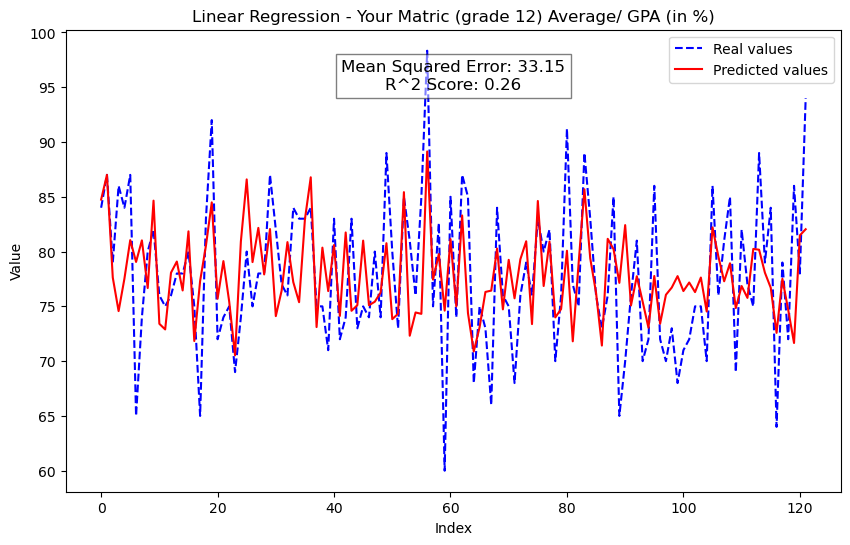

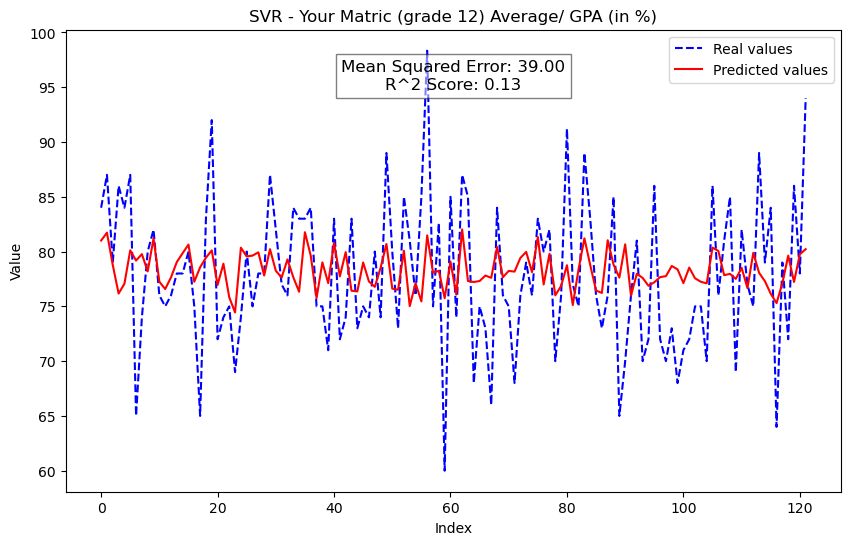

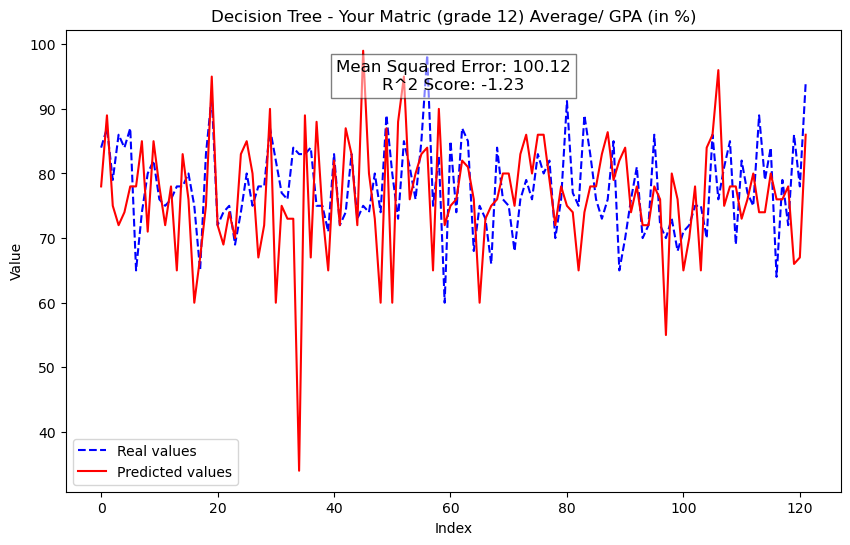

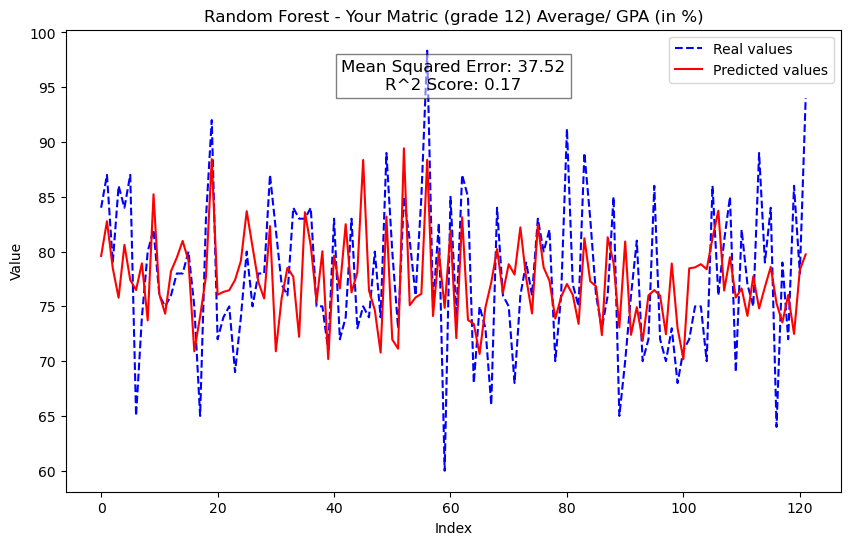

In [771]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definir la variable objetivo y las características
target1 = columnas_numericas[0]
# target2 = columnas_numericas[1]

# Definir características y objetivo
features = df_encoded_nom.drop(columns=[target1])
X = features
y1 = df_encoded_nom[target1]
# y2 = df_encoded_nom[target2]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)
# X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=42)

# Crear pipelines para cada modelo

# Modelo 1: Regresión Lineal
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Aplicar escalado
    ('regressor', LinearRegression())
])

# Modelo 2: Support Vector Regression (SVR)
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),  # Aplicar escalado
    ('regressor', SVR())
])

# Modelo 3: Árboles de Decisión para Regresión
pipeline_dt = Pipeline([
    ('regressor', DecisionTreeRegressor())
])

# Modelo 4: Random Forest para Regresión
pipeline_rf = Pipeline([
    ('regressor', RandomForestRegressor())
])

# Definir los modelos y nombres
models = [('Linear Regression', pipeline_lr),
          ('SVR', pipeline_svr),
          ('Decision Tree', pipeline_dt),
          ('Random Forest', pipeline_rf)]

# Función para graficar los resultados
def plot_predictions(y_true, y_pred, model_name, target_name):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true.values, label='Real values', color='blue', linestyle='--')
    plt.plot(y_pred, label='Predicted values', color='red', linestyle='-')
    plt.title(f'{model_name} - {target_name}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    plt.text(0.5, 0.9, f'Mean Squared Error: {mse:.2f}\nR^2 Score: {r2:.2f}', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

# Entrenar y evaluar modelos para `target1`
print("Modelos para 'Your Matric (grade 12) Average/ GPA (in %)':")

for name, pipeline in models:
    pipeline.fit(X_train, y1_train)
    y1_pred = pipeline.predict(X_test)
    print(f"\n{name}:\n")
    print(f"Mean Squared Error: {mean_squared_error(y1_test, y1_pred):.2f}")
    print(f"R^2 Score: {r2_score(y1_test, y1_pred):.2f}")
    # plot_predictions(y1_test, y1_pred, name, target1)

for name, pipeline in models:
    pipeline.fit(X_train, y1_train)
    y1_pred = pipeline.predict(X_test)
    # print(f"\n{name}:\n")
    # print(f"Mean Squared Error: {mean_squared_error(y1_test, y1_pred):.2f}")
    # print(f"R^2 Score: {r2_score(y1_test, y1_pred):.2f}")
    plot_predictions(y1_test, y1_pred, name, target1)

# Entrenar y evaluar modelos para `target2`
# print("\nModelos para 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)':")

# for name, pipeline in models:
#     pipeline.fit(X_train, y2_train)
#     y2_pred = pipeline.predict(X_test)
#     print(f"\n{name}:\n")
#     print(f"Mean Squared Error: {mean_squared_error(y2_test, y2_pred):.2f}")
#     print(f"R^2 Score: {r2_score(y2_test, y2_pred):.2f}")
#     plot_predictions(y2_test, y2_pred, name, target2)


In [772]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Definir la variable objetivo y las características
# target1 = columnas_numericas[0]
# target2 = columnas_numericas[1]

# # Definir características y objetivo
# features = df_encoded_nom.drop(columns=[target1, target2])
# X = features
# y1 = df_encoded_nom[target1]
# y2 = df_encoded_nom[target2]

# # Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.3, random_state=42)
# X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=42)

# # Crear pipelines para cada modelo

# # Modelo 1: Regresión Lineal
# pipeline_lr = Pipeline([
#     ('scaler', StandardScaler()),  # Aplicar escalado
#     ('regressor', LinearRegression())
# ])

# # Modelo 2: Support Vector Regression (SVR)
# pipeline_svr = Pipeline([
#     ('scaler', StandardScaler()),  # Aplicar escalado
#     ('regressor', SVR())
# ])

# # Modelo 3: Árboles de Decisión para Regresión
# pipeline_dt = Pipeline([
#     ('regressor', DecisionTreeRegressor())
# ])

# # Modelo 4: Random Forest para Regresión
# pipeline_rf = Pipeline([
#     ('regressor', RandomForestRegressor())
# ])

# # Definir los modelos y nombres
# models = [('Linear Regression', pipeline_lr),
#           ('SVR', pipeline_svr),
#           ('Decision Tree', pipeline_dt),
#           ('Random Forest', pipeline_rf)]

# # Función para graficar los resultados
# def plot_scatter(y_true, y_pred, model_name, target_name):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_true, y_pred, alpha=0.5, color='green', edgecolors='k')
#     plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)  # Línea de referencia
#     plt.title(f'{model_name} - {target_name}')
#     plt.xlabel('Real values')
#     plt.ylabel('Predicted values')
    
#     mse = mean_squared_error(y_true, y_pred)
#     r2 = r2_score(y_true, y_pred)
    
#     plt.text(0.05, 0.95, f'Mean Squared Error: {mse:.2f}\nR^2 Score: {r2:.2f}', 
#              transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
#     plt.show()

# # Entrenar y evaluar modelos para `target1`
# print("Modelos para 'Your Matric (grade 12) Average/ GPA (in %)':")

# for name, pipeline in models:
#     pipeline.fit(X_train, y1_train)
#     y1_pred = pipeline.predict(X_test)
#     print(f"\n{name}:\n")
#     print(f"Mean Squared Error: {mean_squared_error(y1_test, y1_pred):.2f}")
#     print(f"R^2 Score: {r2_score(y1_test, y1_pred):.2f}")
#     #plot_scatter(y1_test, y1_pred, name, target1)

# # # Entrenar y evaluar modelos para `target2`
# # print("\nModelos para 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)':")

# # for name, pipeline in models:
# #     pipeline.fit(X_train, y2_train)
# #     y2_pred = pipeline.predict(X_test)
# #     print(f"\n{name}:\n")
# #     print(f"Mean Squared Error: {mean_squared_error(y2_test, y2_pred):.2f}")
# #     print(f"R^2 Score: {r2_score(y2_test, y2_pred):.2f}")
# #     #plot_scatter(y2_test, y2_pred, name, target2)


In [773]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ejemplo de datos
data = {
    'Your Matric (grade 12) Average/ GPA (in %)': [77.99, 66.27, 85.00, 90.00, 78.00] * 80,
    'Your 2023 academic year average/GPA in %': [66.27, 75.00, 70.00, 80.00, 65.00] * 64
}
df = pd.DataFrame(data)

# Histograma del promedio de Matric
plt.figure(figsize=(12, 6))
sns.histplot(df['Your Matric (grade 12) Average/ GPA (in %)'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del Promedio de Matric (Grado 12)')
plt.xlabel('Promedio de Matric (%)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del promedio académico del año 2023
plt.figure(figsize=(12, 6))
sns.histplot(df['Your 2023 academic year average/GPA in %'], bins=20, kde=True, color='salmon')
plt.title('Distribución del Promedio Académico del Año 2023')
plt.xlabel('Promedio Académico 2023 (%)')
plt.ylabel('Frecuencia')
plt.show()


ValueError: All arrays must be of the same length

In [ ]:
df.info()

In [ ]:
# Ejemplo: FacetGrid para explorar 'How often do you go out partying/socialising during the week?' y 'How strong is your relationship with your parent/s?'
g = sns.FacetGrid(df, col=columnas_categoricas[0], hue=columnas_categoricas[1], col_wrap=4, height=4)
g.map(sns.countplot, 'How strong is your relationship with your parent/s?')
g.add_legend()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para 'Your Sex?'
plt.figure(figsize=(10, 6))
sns.countplot(x='Your Sex?', data=df)
plt.title('Distribución por Sexo')
plt.show()

# Gráfico de barras apiladas para 'Were you on scholarship/bursary in 2023?' por 'Your Sex?'
plt.figure(figsize=(12, 6))
sns.countplot(x='Your Sex?', hue='Were you on scholarship/bursary in 2023?', data=df)
plt.title('Becas y becas por Sexo')
plt.show()

# Boxplot del promedio de Matric por 'What faculty does your degree fall under?'
plt.figure(figsize=(12, 6))
sns.boxplot(x='What faculty does your degree fall under?', y='Your Matric (grade 12) Average/ GPA (in %)', data=df)
plt.title('Boxplot del Promedio de Matric por Facultad')
plt.xticks(rotation=45)
plt.show()

# FacetGrid para explorar 'How often do you go out partying/socialising during the week?' y 'How strong is your relationship with your parent/s?'
g = sns.FacetGrid(df, col='How often do you go out partying/socialising during the week?', hue='How strong is your relationship with your parent/s?', col_wrap=4, height=4)
g.map(sns.countplot, 'How strong is your relationship with your parent/s?')
g.add_legend()
plt.show()


In [ ]:
sns.pairplot(df)
plt.title('Gráfico de pares de variables')
plt.show()


In [ ]:
nombre_columna_objetivo = 'Your Matric (grade 12) Average/ GPA (in %)'

# Crear gráficos de barras para una variable categórica y una numérica
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

# Ejemplo de gráfico de barras para nombre_columna_objetivo por 'Your Sex?'
sns.barplot(x='Your Sex?', y=nombre_columna_objetivo, data=df, ax=axes[0, 0])
axes[0, 0].set_title('Promedio del GPA por Sexo')

# Gráfico de cajas para nombre_columna_objetivo por 'What faculty does your degree fall under?'
sns.boxplot(x='What faculty does your degree fall under?', y=nombre_columna_objetivo, data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribución del GPA por Facultad')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico de violín para nombre_columna_objetivo por 'Your Accommodation Status Last Year (2023)'
sns.violinplot(x='Your Accommodation Status Last Year (2023)', y=nombre_columna_objetivo, data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribución del GPA por Estado de Alojamiento')
axes[1, 0].tick_params(axis='x', rotation=45)

# Ajustar título y etiquetas si es necesario
axes[1, 1].axis('off')  # Deja un espacio vacío si hay menos gráficos

plt.show()


In [ ]:
df.columns

In [ ]:
sns.countplot(x='Your Sex?', data=df)
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Observaciones')
plt.show()

In [ ]:
# Gráfico de barras para la variable 'What faculty does your degree fall under?' y 'Your 2023 academic year average/GPA in %'
sns.barplot(x='What faculty does your degree fall under?', y='Your Matric (grade 12) Average/ GPA (in %)', data=df)
plt.title('Promedio del GPA por Facultad')
plt.xlabel('Facultad')
plt.ylabel('Promedio del GPA')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Para usar un gráfico de tarta, se usa matplotlib directamente
sizes = df['What faculty does your degree fall under?'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Facultades')
plt.show()

## Importación de librerías

In [ ]:
import pandas as pd
from summarytools import dfSummary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Lectura del archivo con los datos

In [ ]:
data = pd.read_csv("stats_survey.csv")
data.head(), data.info(), data.describe()

## Resumen Mejorado de los datos

In [ ]:
data = data.iloc[:,1:]
dfSummary(data)

## Generación de la tabla que describe los datos

In [ ]:
variables = data.columns
descripciones = [
    "Sexo del estudiante",
    "Rendimiento escolar en porcentaje",
    "Año en el que estaba el estudiante en 2023",
    "Facultad a la que pertenece el grado del estudiante",
    "Promedio académico del año 2023 en porcentaje",
    "Estado de alojamiento del estudiante en 2023",
    "Mesada mensual en 2023",
    "Beca o financiamiento en 2023",
    "Horas adicionales de estudio por semana",
    "Frecuencia de salidas sociales durante la semana",
    "Número de bebidas alcohólicas consumidas en una salida nocturna",
    "Clases perdidas por razones relacionadas con el alcohol",
    "Cantidad de módulos que el estudiante ha reprobado hasta el momento en sus estudios.",
    "¿El estudiante actualmente está en una relación romántica?",
    "Aprobación del consumo de alcohol por parte de los padres",
    "Relación con los padres",
]
tipos = [
    "Cualitativa",
    "Cuantitativa",
    "Cualitativa",
    "Cualitativa",
    "Cuantitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
]
tipos_de_datos = [
    "Cadena",
    "Decimal",
    "Cadena",
    "Cadena",
    "Decimal",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
]

In [ ]:
description_table = pd.DataFrame(
    {
        "Variable": variables,
        "Descripción": descripciones,
        "Tipo": tipos,
        "Tipo de Dato": tipos_de_datos,
    }
)
description_table

In [ ]:
# Eliminar filas incompletas de la columna objetivo y con el criterio de los estudiantes universitarios
data = data.dropna(
    subset=[
        "What year were you in last year (2023) ?",
        "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)",
    ]
)

# Codificación de variables categóricas
categorical_columns = [
    "Your Sex?",
    "What year were you in last year (2023) ?",
    "What faculty does your degree fall under?",
    "Your Accommodation Status Last Year (2023)",
    "Monthly Allowance in 2023",
    "Were you on scholarship/bursary in 2023?",
    "Additional amount of studying (in hrs) per week",
    "How often do you go out partying/socialising during the week? ",
    "On a night out, how many alcoholic drinks do you consume?",
    "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",
    "How many modules have you failed thus far into your studies?",
    "Are you currently in a romantic relationship?",
    "Do your parents approve alcohol consumption?",
    "How strong is your relationship with your parent/s?",
]
# Aplicamos one-hot encoding para estas variables
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# División de los datos
X = data_encoded.drop(columns=["Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)"])
# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)
y = data_encoded["Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarización/Normalización
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostrar resultados preliminares
X_train_scaled[:5], y_train[:5]

# Crear el modelo de regresión logística
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


In [ ]:


df = pd.read_csv('stats_survey.csv')

# Paso 1: Limpieza y Preprocesamiento de los Datos

# 1.1 Manejo de Valores Nulos
# Imputar valores faltantes en columnas numéricas con la mediana
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Imputar valores faltantes en columnas categóricas con la moda
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# 1.2 Codificación de Variables Categóricas
# One-Hot Encoding para variables categóricas nominales
df = pd.get_dummies(df, drop_first=True)

# 1.3 Separación de Datos
# Definir X y y
X = df.drop('Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', axis=1)
y = df['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']

# Normalización de las características
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Paso 2: Implementación del Modelo de Regresión Lineal

# 2.1 División del Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.2 Entrenamiento del Modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 2.3 Evaluación del Modelo
y_pred = regressor.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Opcional: Visualización de los resultados
plt.figure(figsize=(10, 6))

# Trazar los puntos para valores reales
plt.scatter(y_test, y_pred, color='red', label='Predicciones', alpha=0.7)

# Trazar la línea de igualdad (valores reales = predicciones)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Línea de Igualdad')

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Valores Reales vs Predicciones')
plt.legend()
plt.show()